In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터 불러오기

In [7]:
nox_day = pd.read_excel('./한국남동발전_대기오염물질배출농도(일평균).xls')
nox = pd.read_excel('./한국남동발전_대기오염물질배출농도.xls')
fuel = pd.read_excel('./한국남동발전_연료소비실적.xls')
concentration = pd.read_excel('./한국남동발전_발전소주변농도(일평균).xls')
weather = pd.read_excel('./한국남동발전_기상정보(일평균).xls')
weather_ys = pd.read_csv('./여수산단_방재기상관측(일별).csv')
weather_ys_23 = pd.read_csv('./여수산단_습도_기압(2023).xls')
weather_ys_24 = pd.read_csv('./여수산단_습도_기압(2024).xls')
weather_final = pd.read_csv('./기상정보.csv', encoding='cp949')
power = pd.read_csv('./한국남동발전_발전실적.csv')
power_day = pd.read_csv('./일별화력발전데이터.csv')

In [90]:
# 전처리 
# df['일자']가 int 또는 str 타입일 경우
nox_day['일자'] = pd.to_datetime(nox_day['일자'].astype(str), format='%Y%m%d')
nox['일자'] = pd.to_datetime(nox['일자'].astype(str), format='%Y%m')
fuel['일자'] = pd.to_datetime(fuel['일자'].astype(str), format='%Y%m')

In [74]:
nox['사업소'].unique()

array(['삼천포발전본부', '영동에코발전본부', '영흥발전본부', '여수발전본부', '분당발전본부'], dtype=object)

In [75]:
nox_day['사업소'].unique()

array(['분당', '삼천포', '영동', '영흥', '여수'], dtype=object)

## 대기오염물질 배출농도 (nox)

In [7]:
nox.head()

,사업소,호기,일자,황산화물(ppm)기준,황산화물(ppm)평균,질소산화물(ppm)기준,질소산화물(ppm)평균,먼지(㎎/S㎥)기준,먼지(㎎/S㎥)평균
0,삼천포발전본부,#1~4호기,202412,70.0,14.1,140.0,32.0,25.0,2.8
1,삼천포발전본부,#5~6호기,202412,140.0,9.5,140.0,1.4,25.0,0.8
2,영동에코발전본부,#1~2호기,202412,100.0,9.2,320.0,23.0,25.0,1.2
3,영흥발전본부,#1~2호기,202412,45.0,1.7,55.0,9.9,20.0,4.2
4,영흥발전본부,#3~4호기,202412,25.0,16.1,15.0,12.0,5.0,1.5


In [98]:
nox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사업소           147 non-null    object        
 1   호기            147 non-null    object        
 2   일자            147 non-null    datetime64[ns]
 3   황산화물(ppm)기준   136 non-null    float64       
 4   황산화물(ppm)평균   147 non-null    float64       
 5   질소산화물(ppm)기준  136 non-null    float64       
 6   질소산화물(ppm)평균  147 non-null    float64       
 7   먼지(㎎/S㎥)기준    136 non-null    float64       
 8   먼지(㎎/S㎥)평균    147 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 10.5+ KB


In [100]:
# 여수발전본부 1호기의 기준 부재
nox[nox['질소산화물(ppm)기준'].isnull()]

# 2호기의 질소산화물 기준은 50ppm임 -> 1호기와 2호기의 배출량이 비슷하므로 같은 기준으로 설정해도 될듯 

,사업소,호기,일자,황산화물(ppm)기준,황산화물(ppm)평균,질소산화물(ppm)기준,질소산화물(ppm)평균,먼지(㎎/S㎥)기준,먼지(㎎/S㎥)평균
50,여수발전본부,#1호기,2024-04-01,NaN,4.3,NaN,16.0,NaN,3.4
59,여수발전본부,#1호기,2024-03-01,NaN,6.3,NaN,19.5,NaN,2.6
68,여수발전본부,#1호기,2024-02-01,NaN,2.7,NaN,18.9,NaN,2.0
77,여수발전본부,#1호기,2024-01-01,NaN,3.3,NaN,18.7,NaN,1.9
87,여수발전본부,#1호기,2023-07-01,NaN,0.9,NaN,20.5,NaN,2.1
96,여수발전본부,#1호기,2023-06-01,NaN,1.5,NaN,19.9,NaN,2.0
105,여수발전본부,#1호기,2023-05-01,NaN,2.2,NaN,18.6,NaN,2.3
114,여수발전본부,#1호기,2023-04-01,NaN,6.3,NaN,20.1,NaN,2.3
123,여수발전본부,#1호기,2023-03-01,NaN,2.7,NaN,18.3,NaN,2.4
132,여수발전본부,#1호기,2023-02-01,NaN,2.1,NaN,18.1,NaN,2.3


In [84]:
# df['일자']가 int 또는 str 타입일 경우
nox['일자'] = pd.to_datetime(nox['일자'].astype(str), format='%Y%m')
nox.head()

,사업소,호기,일자,황산화물(ppm)기준,황산화물(ppm)평균,질소산화물(ppm)기준,질소산화물(ppm)평균,먼지(㎎/S㎥)기준,먼지(㎎/S㎥)평균
0,삼천포발전본부,#1~4호기,2024-12-01,70.0,14.1,140.0,32.0,25.0,2.8
1,삼천포발전본부,#5~6호기,2024-12-01,140.0,9.5,140.0,1.4,25.0,0.8
2,영동에코발전본부,#1~2호기,2024-12-01,100.0,9.2,320.0,23.0,25.0,1.2
3,영흥발전본부,#1~2호기,2024-12-01,45.0,1.7,55.0,9.9,20.0,4.2
4,영흥발전본부,#3~4호기,2024-12-01,25.0,16.1,15.0,12.0,5.0,1.5


#### 발전소별 월별 평균 배출량

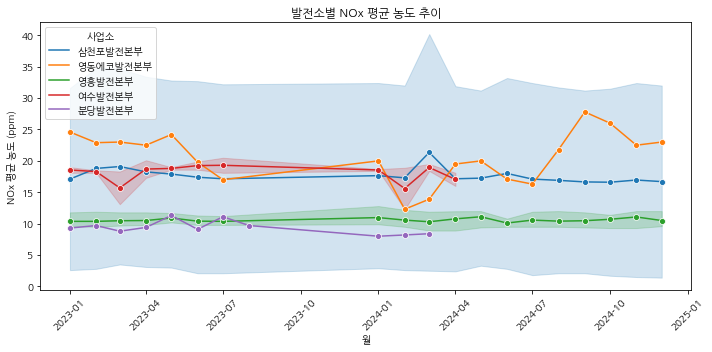

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=nox, x='일자', y='질소산화물(ppm)평균', hue='사업소', marker='o')

plt.title('발전소별 NOx 평균 농도 추이')
plt.xlabel('월')
plt.ylabel('NOx 평균 농도 (ppm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

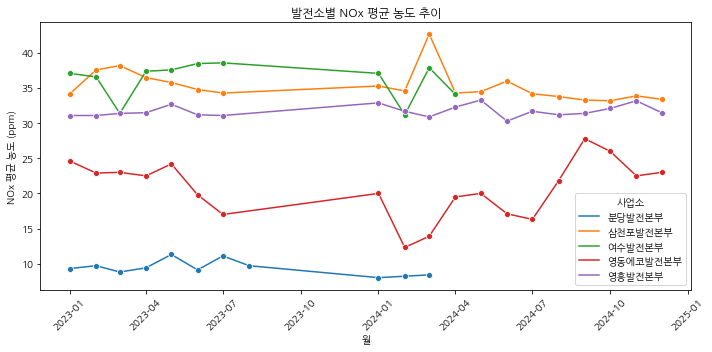

In [114]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=nox_plant, x='일자', y='질소산화물(ppm)평균', hue='사업소', marker='o')

plt.title('발전소별 NOx 평균 농도 추이')
plt.xlabel('월')
plt.ylabel('NOx 평균 농도 (ppm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
nox_plant = nox.groupby(['사업소', '일자']).sum()
nox_plant

황산화물(ppm)기준  황산화물(ppm)평균  질소산화물(ppm)기준  질소산화물(ppm)평균  \
사업소    일자                                                                 
분당발전본부 2023-01-01         35.0          0.0         100.0           9.3   
       2023-02-01         35.0          0.0         100.0           9.7   
       2023-03-01         35.0          0.0         100.0           8.8   
       2023-04-01         35.0          0.0         100.0           9.4   
       2023-05-01         35.0          0.0         100.0          11.3   
...                        ...          ...           ...           ...   
영흥발전본부 2024-08-01         95.0         27.6          85.0          31.2   
       2024-09-01         95.0         25.9          85.0          31.4   
       2024-10-01         95.0         26.8          85.0          32.1   
       2024-11-01         95.0         27.4          85.0          33.2   
       2024-12-01         95.0         27.4          85.0          31.5   

                   먼지(㎎/S㎥)기준  먼지(㎎/S㎥)평균  
사업소    일자                                  
분당발전본부 2023-01-01        15.0         0.0  
       2023-02-01        15.0         0.0  
       2023-03-01        15.0         0.0  
       2023-04-01        15.0         0.0  
       2023-05-01        15.0         0.0  
...                       ...         ...  
영흥발전본부 2024-08-01        30.0         6.3  
       2024-09-01        30.0         6.0  
       2024-10-01        30.0         5.4  
       2024-11-01        30.0         5.3  
       2024-12-01        30.0         7.8  

[79 rows x 6 columns]

In [117]:
nox_plant.loc['분당발전본부']

,황산화물(ppm)기준,황산화물(ppm)평균,질소산화물(ppm)기준,질소산화물(ppm)평균,먼지(㎎/S㎥)기준,먼지(㎎/S㎥)평균
일자,,,,,,
2023-01-01,35.0,0.0,100.0,9.3,15.0,0.0
2023-02-01,35.0,0.0,100.0,9.7,15.0,0.0
2023-03-01,35.0,0.0,100.0,8.8,15.0,0.0
2023-04-01,35.0,0.0,100.0,9.4,15.0,0.0
2023-05-01,35.0,0.0,100.0,11.3,15.0,0.0
2023-06-01,35.0,0.0,100.0,9.1,15.0,0.0
2023-07-01,35.0,0.0,100.0,11.1,15.0,0.0
2023-08-01,35.0,0.0,100.0,9.7,15.0,0.0
2024-01-01,35.0,0.0,100.0,8.0,15.0,0.0


In [ ]:
nox[nox['사업소'] == '삼천포발전본부'].sort_index(ascending=False)

- 23년 8월부터 23년 12월까지 데이터 누락 (일자에 아예 없음)
- 분당발전본부만 23년 8월 데이터 존재

In [22]:
nox[nox['일자'] == '2023-08-01']

,사업소,호기,일자,황산화물(ppm)기준,황산화물(ppm)평균,질소산화물(ppm)기준,질소산화물(ppm)평균,먼지(㎎/S㎥)기준,먼지(㎎/S㎥)평균
83,분당발전본부,#1~8호기,2023-08-01,35.0,0.0,100.0,9.7,15.0,0.0


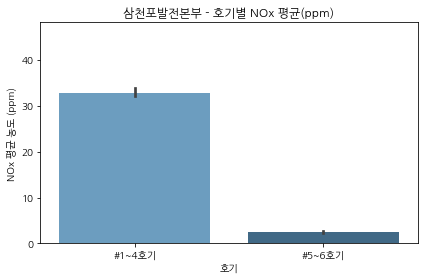

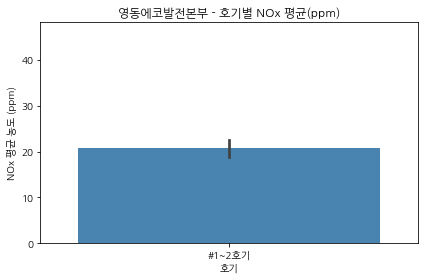

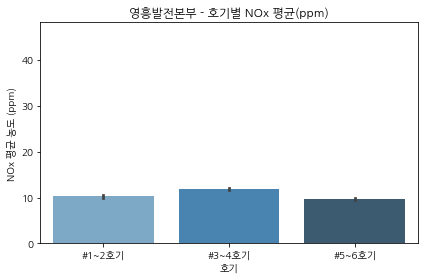

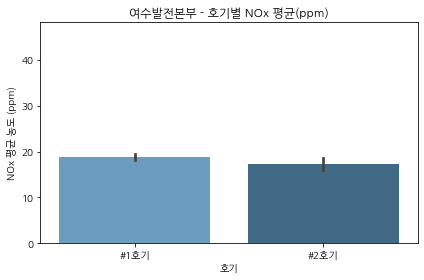

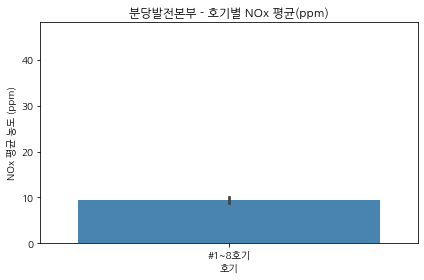

In [5]:
import seaborn as sns

# 사업소 리스트
plants = nox['사업소'].unique()

for plant in plants:
    sub_df = nox[nox['사업소'] == plant]

    plt.figure(figsize=(6, 4))
    sns.barplot(data=sub_df, x='호기', y='질소산화물(ppm)평균', palette='Blues_d')

    plt.title(f'{plant} - 호기별 NOx 평균(ppm)')
    plt.xlabel('호기')
    plt.ylabel('NOx 평균 농도 (ppm)')
    plt.ylim(0, nox['질소산화물(ppm)평균'].max() * 1.2)  # 축 정렬
    plt.tight_layout()
    plt.show()

In [125]:
nox_plant[nox_plant.index.get_level_values('사업소') == '분당발전본부']


황산화물(ppm)기준  황산화물(ppm)평균  질소산화물(ppm)기준  질소산화물(ppm)평균  \
사업소    일자                                                                 
분당발전본부 2023-01-01         35.0          0.0         100.0           9.3   
       2023-02-01         35.0          0.0         100.0           9.7   
       2023-03-01         35.0          0.0         100.0           8.8   
       2023-04-01         35.0          0.0         100.0           9.4   
       2023-05-01         35.0          0.0         100.0          11.3   
       2023-06-01         35.0          0.0         100.0           9.1   
       2023-07-01         35.0          0.0         100.0          11.1   
       2023-08-01         35.0          0.0         100.0           9.7   
       2024-01-01         35.0          0.0         100.0           8.0   
       2024-02-01         35.0          0.0         100.0           8.2   
       2024-03-01         35.0          0.0         100.0           8.4   

                   먼지(㎎/S㎥)기준  먼지(㎎/S㎥)평균  
사업소    일자                                  
분당발전본부 2023-01-01        15.0         0.0  
       2023-02-01        15.0         0.0  
       2023-03-01        15.0         0.0  
       2023-04-01        15.0         0.0  
       2023-05-01        15.0         0.0  
       2023-06-01        15.0         0.0  
       2023-07-01        15.0         0.0  
       2023-08-01        15.0         0.0  
       2024-01-01        15.0         0.0  
       2024-02-01        15.0         0.0  
       2024-03-01        15.0         0.0

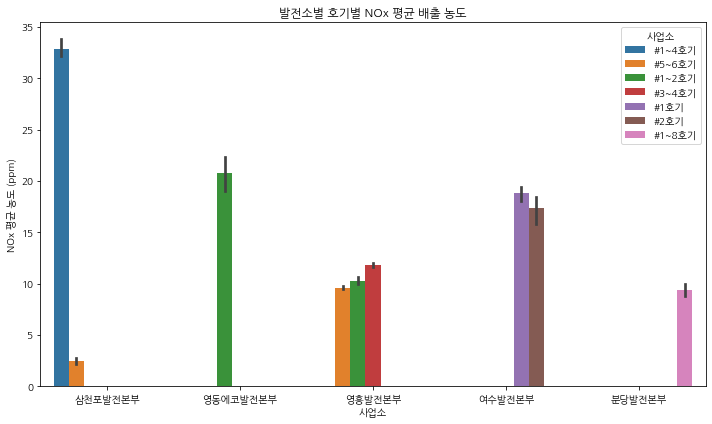

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=nox, x='사업소', y='질소산화물(ppm)평균', hue='호기', dodge=True)

plt.title('발전소별 호기별 NOx 평균 배출 농도')
plt.xlabel('사업소')
plt.ylabel('NOx 평균 농도 (ppm)')
plt.legend(title='사업소')
plt.tight_layout()
plt.show()

## 대기오염물질 배출농도(일평균) (nox_day)

- ✅ 유량 (Flow rate)

    - 정의: 단위 시간당 유입되는 공기 또는 연료의 양
    - 단위: 보통 kg/h, Nm³/h, 또는 해당 발전소 계측 장치 기준 단위 (공기 또는 배출가스 유량일 가능성 높음)
    - 유량이 의미하는 것: 연소 공정의 세기나 배기가스의 양
    = 유량이 많다는 건 → 연료를 많이 태우거나, 공기를 많이 넣는 상황
    - 연료 투입량, 산소량과 함께 보면 NOx 생성 조건과 관련됨

- ✅ 온도 (Temperature)
    - 정의: 보일러, 터빈, 또는 배출가스의 측정 지점의 온도
    - 단위: 보통 ℃
    - 발전 공정에서는 다양한 온도가 측정되며, 여기선 아마도 연소실 온도 또는 배출가스 온도일 가능성
    - 온도가 의미하는 것: 온도가 높을수록 질소산화물(NOx) 생성량이 증가하는 경향 있음

In [164]:
# df['일자']가 int 또는 str 타입일 경우
nox_day['일자'] = pd.to_datetime(nox_day['일자'].astype(str), format='%Y%m%d')
nox_day.head()

,사업소,호기,일자,SOX,NOX,먼지,산소,유량,온도
0,분당,1호기,2024-12-31,NaN,6.76,NaN,15.38,52558.65,124.67
1,분당,2호기,2024-12-31,NaN,3.86,NaN,20.90,82.73,16.32
2,분당,3호기,2024-12-31,NaN,8.07,NaN,15.22,69124.62,123.12
3,분당,4호기,2024-12-31,NaN,3.47,NaN,20.85,109.42,20.09
4,분당,5호기,2024-12-31,NaN,8.09,NaN,15.66,82712.37,108.17


#### 발전소별 질소산화물 배출량

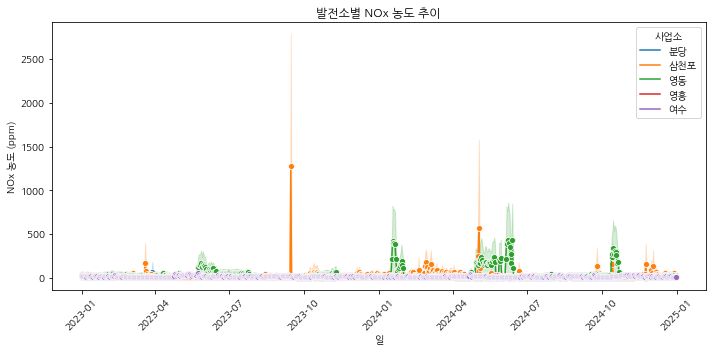

In [36]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=nox_day, x='일자', y='NOX', hue='사업소', marker='o')

plt.title('발전소별 NOx 농도 추이')
plt.xlabel('일')
plt.ylabel('NOx 농도 (ppm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

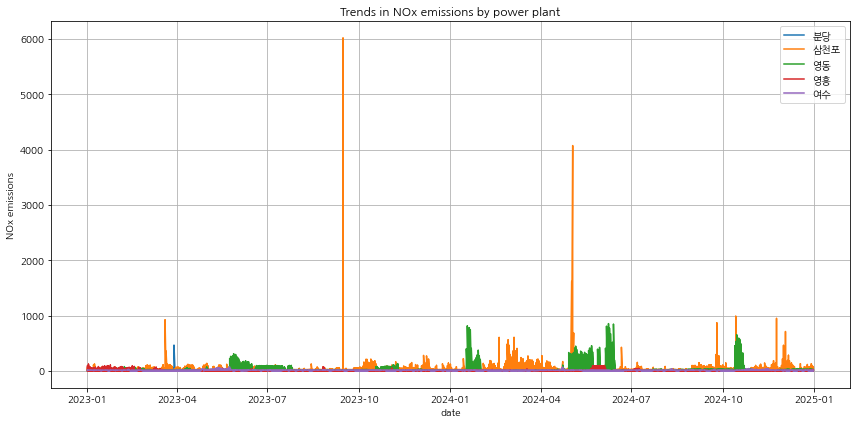

In [35]:
plt.figure(figsize=(12, 6))

# 발전소 목록
plants = nox_day['사업소'].unique()

for plant in plants:
    sub_df = nox_day[nox_day['사업소'] == plant]
    plt.plot(sub_df['일자'], sub_df['NOX'], label=plant)

plt.title('Trends in NOx emissions by power plant')
plt.xlabel('date')
plt.ylabel('NOx emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 이상치 판별(삼천포 발전소)

In [208]:
scp_nox = nox_day[nox_day['사업소'] == '삼천포']
scp_nox = scp_nox.reset_index(drop=True)

Q1 = scp_nox['NOX'].quantile(0.25)
Q3 = scp_nox['NOX'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준 (Q3 + 1.5*IQR)
outlier_threshold = Q3 + 1.5 * IQR
outliers = scp_nox[scp_nox['NOX'] > outlier_threshold]


In [230]:
outliers.sort_values('NOX', ascending=False)[:20]

,사업소,호기,일자,SOX,NOX,먼지,산소,유량,온도
3720,삼천포,5B호기,2023-09-15,0.90,6014.68,82.65,21.10,773.81,24.41
1943,삼천포,6B호기,2024-05-03,127.62,4073.62,117.36,21.13,445.81,17.91
3719,삼천포,5A호기,2023-09-15,19.47,4036.06,129.42,21.06,911.92,24.34
1951,삼천포,6B호기,2024-05-02,109.96,1620.95,100.05,21.12,478.22,16.36
627,삼천포,4B호기,2024-10-14,0.65,991.33,16.44,21.07,395.07,21.55
297,삼천포,3B호기,2024-11-24,17.62,951.98,296.42,14.41,28867.84,51.13
5147,삼천포,3A호기,2023-03-20,5.93,929.27,46.87,20.91,140.39,15.68
778,삼천포,4A호기,2024-09-25,31.69,871.08,43.61,21.15,0.00,23.89
227,삼천포,4B호기,2024-12-03,4.41,714.84,681.43,21.01,655.75,10.37
1935,삼천포,6B호기,2024-05-04,62.57,689.54,99.29,21.12,444.38,19.93


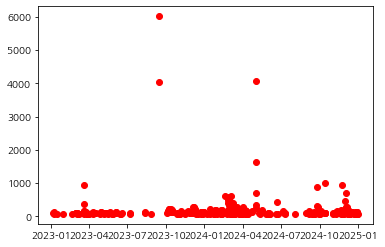

In [178]:
plt.scatter(outliers['일자'], outliers['NOX'], color="red", label="이상치")

In [184]:
scp_nox['NOX'].max()

6014.68

In [211]:
max_index = scp_nox['NOX'].idxmax()
scp_nox.loc[max_index]

사업소                    삼천포
호기                    5B호기
일자     2023-09-15 00:00:00
SOX                    0.9
NOX                6014.68
먼지                   82.65
산소                    21.1
유량                  773.81
온도                   24.41
Name: 3720, dtype: object

In [212]:
start = max_index - 10
end = max_index + 10

subset = scp_nox.iloc[start:end+1]  # end 포함되게 +1

print(subset)


      사업소    호기         일자    SOX      NOX      먼지     산소        유량      온도
3710  삼천포  4B호기 2023-09-16  13.41    31.02    4.01   5.92  89380.52   90.05
3711  삼천포  5A호기 2023-09-16   3.61     0.03  116.83  21.06    899.97   24.48
3712  삼천포  5B호기 2023-09-16   0.63     0.05   87.77  21.10    767.22   24.77
3713  삼천포  6A호기 2023-09-16  10.84     2.41    1.00   5.54  79286.34   72.78
3714  삼천포  6B호기 2023-09-16   5.44     2.85    1.61   5.47  80985.17   91.55
3715  삼천포  3A호기 2023-09-15  18.48    29.56    3.87   6.30  69673.04   99.95
3716  삼천포  3B호기 2023-09-15  23.78    29.29    3.74   6.20  46712.56  102.92
3717  삼천포  4A호기 2023-09-15  27.68    31.02    4.72   6.04  84577.82   95.85
3718  삼천포  4B호기 2023-09-15  13.68    30.29    4.00   6.00  87226.08   91.27
3719  삼천포  5A호기 2023-09-15  19.47  4036.06  129.42  21.06    911.92   24.34
3720  삼천포  5B호기 2023-09-15   0.90  6014.68   82.65  21.10    773.81   24.41
3721  삼천포  6A호기 2023-09-15  11.30     2.78    0.94   5.78  76394.07   72.61
3722  삼천포  6

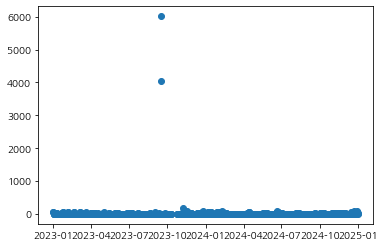

In [218]:
scp_5a5b = scp_nox[scp_nox['호기'].isin(['5A호기', '5B호기'])].reset_index(drop=True)
plt.scatter(scp_5a5b['일자'], scp_5a5b['NOX'])

In [219]:
max_index = scp_5a5b['NOX'].idxmax()

start = max_index - 10
end = max_index + 10

subset = scp_5a5b.iloc[start:end+1]  # end 포함되게 +1

print(subset)

     사업소    호기         일자    SOX      NOX      먼지     산소       유량     온도
909  삼천포  5B호기 2023-09-20  11.63     0.03   63.32  21.13   777.83  25.72
910  삼천포  5A호기 2023-09-19  13.04     0.00  127.09  21.07  1367.63  25.49
911  삼천포  5B호기 2023-09-19   5.79     0.05   95.35  21.11  1172.48  25.65
912  삼천포  5A호기 2023-09-18   5.78     0.00  128.76  21.06   874.80  25.27
913  삼천포  5B호기 2023-09-18   0.03     0.00   87.42  21.10   761.97  25.63
914  삼천포  5A호기 2023-09-17   1.55     0.01  117.64  21.06   884.02  24.29
915  삼천포  5B호기 2023-09-17   1.00     0.12   81.69  21.10   762.33  24.78
916  삼천포  5A호기 2023-09-16   3.61     0.03  116.83  21.06   899.97  24.48
917  삼천포  5B호기 2023-09-16   0.63     0.05   87.77  21.10   767.22  24.77
918  삼천포  5A호기 2023-09-15  19.47  4036.06  129.42  21.06   911.92  24.34
919  삼천포  5B호기 2023-09-15   0.90  6014.68   82.65  21.10   773.81  24.41
920  삼천포  5A호기 2023-09-14  14.90     0.00  123.96  21.06   918.96  24.79
921  삼천포  5B호기 2023-09-14   0.48     0.00   85.22  

In [234]:
df3[df3['사업소'] == '삼천포'][12:]

,사업소,호기,일자,유연탄,무연탄,계(석탄),유류,LNG,고형연료,우드펠릿
98,삼천포,소계,2023-12,427631,0,427631,1540,0,3318,0
106,삼천포,소계,2023-11,304836,0,304836,1105,0,3838,0
114,삼천포,소계,2023-10,249088,0,249088,849,0,2107,0
122,삼천포,소계,2023-09,312604,0,312604,318,0,1841,0
130,삼천포,소계,2023-08,494790,0,494790,1215,0,3538,0
138,삼천포,소계,2023-07,460701,0,460701,1400,0,2730,0
146,삼천포,소계,2023-06,418074,0,418074,1041,0,3408,0
154,삼천포,소계,2023-05,522070,0,522070,1427,0,2798,0
162,삼천포,소계,2023-04,404201,0,404201,1683,0,3187,0
170,삼천포,소계,2023-03,359027,0,359027,1381,0,588,0


<AxesSubplot:xlabel='일자'>

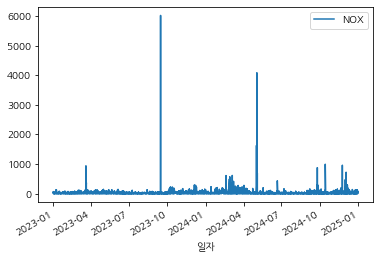

In [233]:
scp_nox.sort_values('NOX', ascending=False).plot('일자', 'NOX')

#### 발전소 개별 질소산화물 배출량

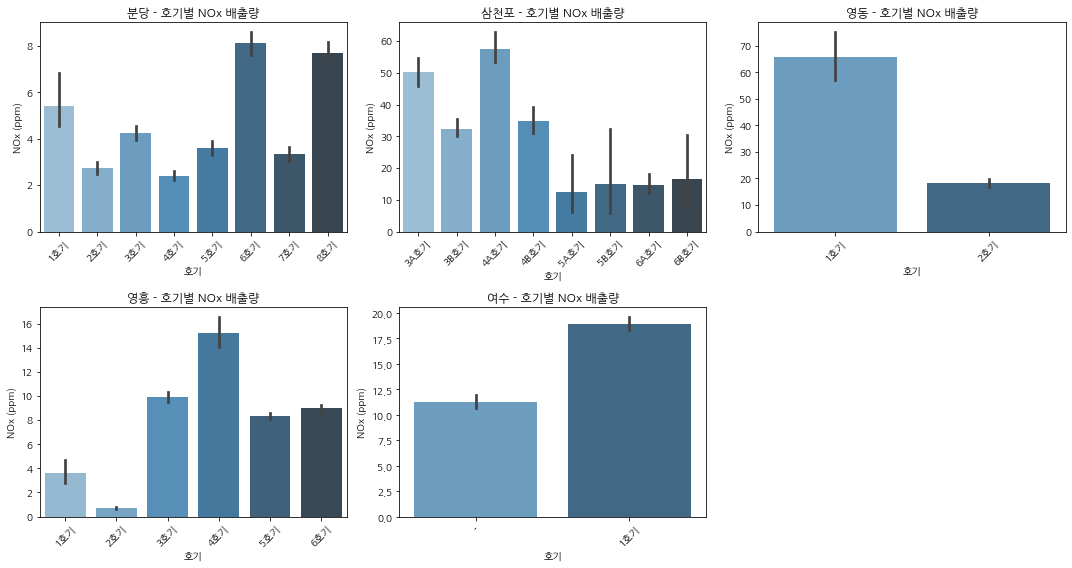

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plants = nox_day['사업소'].unique()
n = len(plants)

# subplot 크기 설정 
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # 2D -> 1D로 평탄화

for i, plant in enumerate(plants):
    sub_df = nox_day[nox_day['사업소'] == plant]

    sns.barplot(data=sub_df, x='호기', y='NOX', palette='Blues_d', ax=axes[i])
    axes[i].set_title(f'{plant} - 호기별 NOx 배출량')
    axes[i].set_xlabel('호기')
    axes[i].set_ylabel('NOx (ppm)')
    axes[i].tick_params(axis='x', rotation=45)

# 남는 subplot 숨기기 (사업소 개수 < subplot 개수일 경우)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

# 사업소 리스트
plants = nox_day['사업소'].unique()

for plant in plants:
    sub_df = nox_day[nox_day['사업소'] == plant]

    fig, axes = plt.subplots(figsize=(10, 8))
    sns.barplot(data=sub_df, x='호기', y='NOX', palette='Blues_d')

    plt.title(f'{plant} - 호기별 NOx 배출량(ppm)')
    plt.xlabel('호기')
    plt.ylabel('NOx 배출량 (ppm)')
    plt.tight_layout()
    plt.show()

#### 발전소별 일평균 (월별, 전체 호기 합산)
- 발전소별 일평균 배출량 (전체 호기 합산)
- 일평균 배출량 계산 시 데이터가 너무 많아 일평균 데이터 월별로 한번 더 합침

In [339]:
# 월 컬럼 추가
df_day = nox_day.copy()
daily_sum = df_day.groupby(['사업소', '일자']).sum().reset_index() # 전체 호기 배출량 합산
daily_sum['월'] = daily_sum['일자'].dt.to_period('M').astype(str)  # 예: '2024-12'
monthly_avg = daily_sum.groupby(['사업소', '월']).mean().reset_index() # 월단위 일평균 계산

In [ ]:
'''
# 월 컬럼 추가
df_day = nox_day.copy()
daily_sum = df_day.groupby(['사업소', '일자'])['NOX'].sum().reset_index() # 전체 호기 배출량 합산
daily_sum['월'] = daily_sum['일자'].dt.to_period('M').astype(str)  # 예: '2024-12'
monthly_avg = daily_sum.groupby(['사업소', '월'])['NOX'].mean().reset_index() # 월단위 일평균 계산
'''

In [172]:
monthly_avg

,사업소,월,NOX
0,분당,2023-01,61.199677
1,분당,2023-02,55.226429
2,분당,2023-03,63.494194
3,분당,2023-04,38.636333
4,분당,2023-05,58.801290
...,...,...,...
115,영흥,2024-08,50.130333
116,영흥,2024-09,39.684333
117,영흥,2024-10,31.078387
118,영흥,2024-11,30.919667


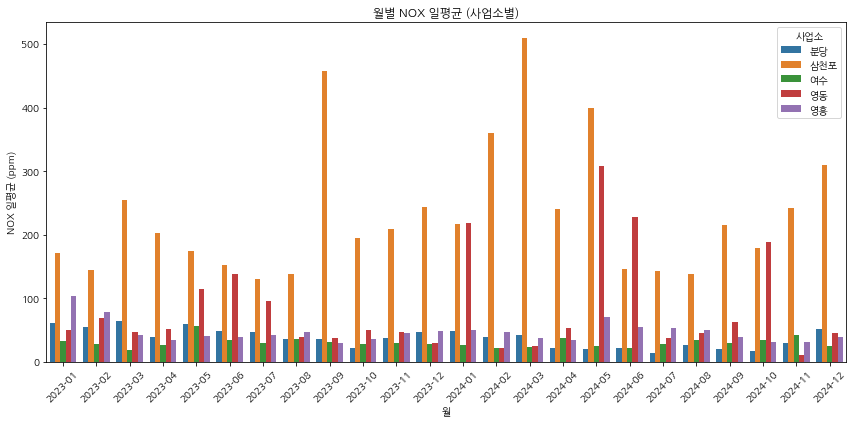

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg, x='월', y='NOX', hue='사업소')

plt.title('월별 NOX 일평균 (사업소별)')
plt.xlabel('월')
plt.ylabel('NOX 일평균 (ppm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

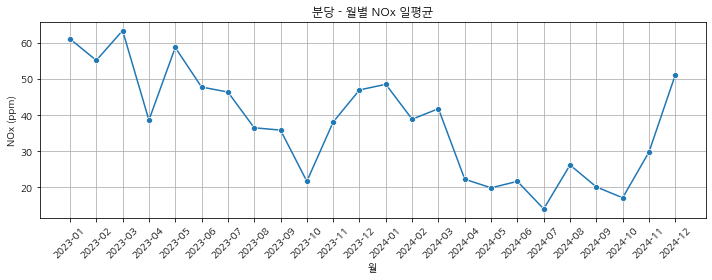

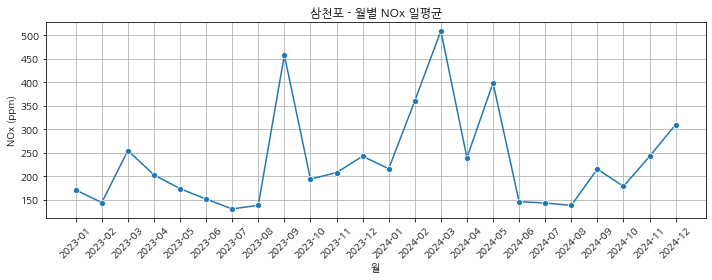

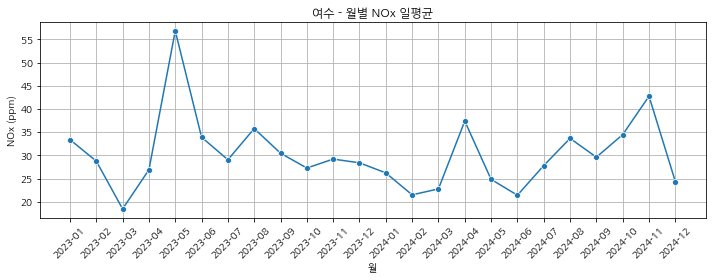

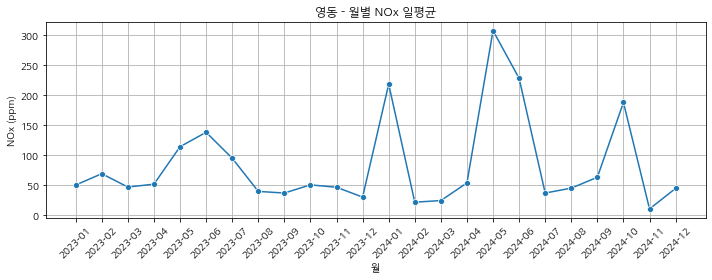

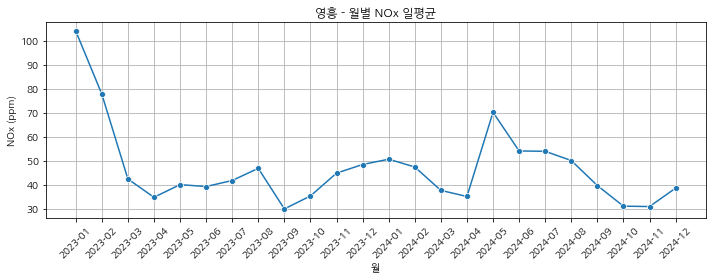

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# 사업소 목록
plants = monthly_avg['사업소'].unique()

# 발전소별 그래프 개별 출력
for plant in plants:
    sub_df = monthly_avg[monthly_avg['사업소'] == plant]

    plt.figure(figsize=(10, 4))
    sns.lineplot(data=sub_df, x='월', y='NOX',  marker='o')

    plt.title(f'{plant} - 월별 NOx 일평균')
    plt.xlabel('월')
    plt.ylabel('NOx (ppm)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


- 분당: 겨울에 배출량 많음
- 나머지: 특정 구간에 피크점이 있음

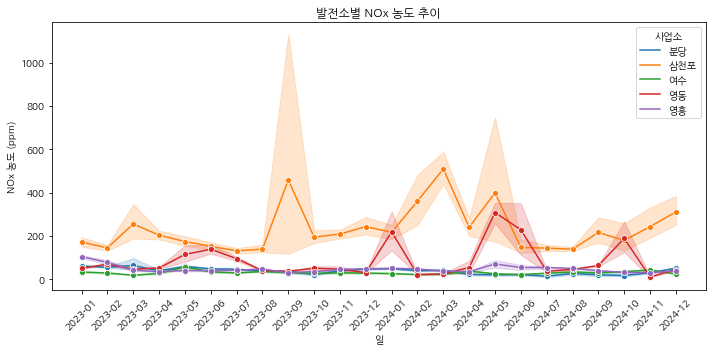

In [181]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_sum, x='월', y='NOX', hue='사업소', marker='o')

plt.title('발전소별 NOx 농도 추이')
plt.xlabel('일')
plt.ylabel('NOx 농도 (ppm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 발전소별 일별 추이

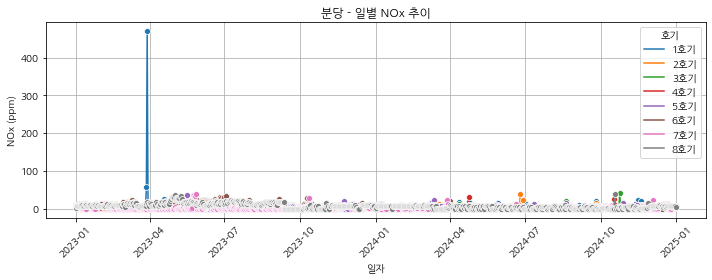

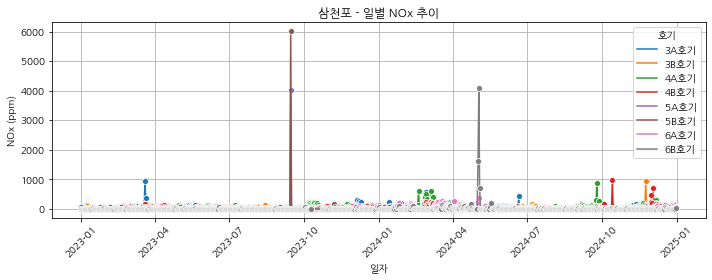

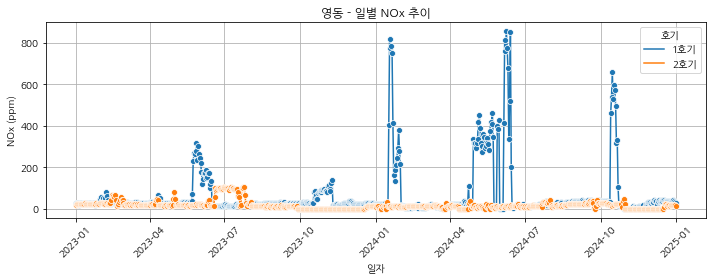

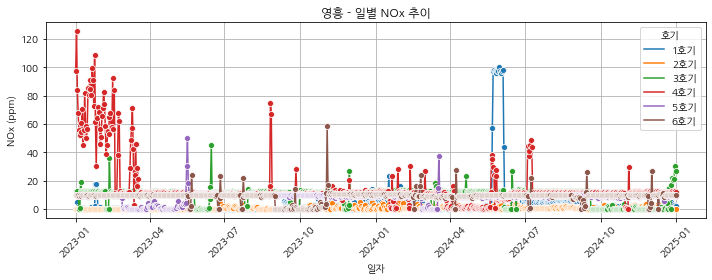

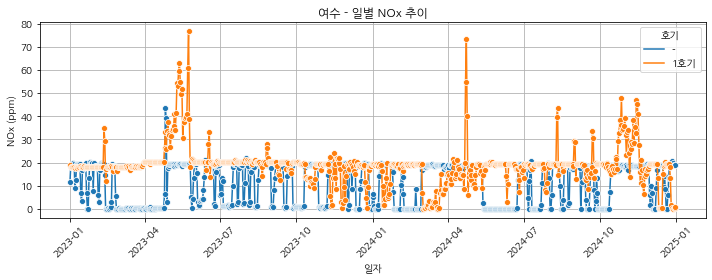

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 사업소 목록
plants = nox_day['사업소'].unique()

# 발전소별 그래프 개별 출력
for plant in plants:
    sub_df = nox_day[nox_day['사업소'] == plant]

    plt.figure(figsize=(10, 4))
    sns.lineplot(data=sub_df, x='일자', y='NOX', hue='호기', marker='o')

    plt.title(f'{plant} - 일별 NOx 추이')
    plt.xlabel('일자')
    plt.ylabel('NOx (ppm)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [73]:
# idxmax()는 그룹별 최대값의 인덱스를 반환함
max_rows = nox_day.loc[nox_day.groupby('사업소')['NOX'].idxmax()]
print(max_rows)

       사업소    호기         일자    SOX      NOX      먼지     산소      유량     온도  \
16618   분당   1호기 2023-03-29    NaN   470.88     NaN  20.76  490.91  49.26   
12212  삼천포  5B호기 2023-09-15   0.90  6014.68   82.65  21.10  773.81  24.41   
15188   여수   1호기 2023-05-24   0.00    76.91  253.58  20.90  421.59  22.28   
5358    영동   1호기 2024-06-08  45.57   858.45   96.54  20.78    3.64  19.83   
18871   영흥   4호기 2023-01-02  61.76   125.69  150.41  20.91    7.98   0.00   

             월  
16618  2023-03  
12212  2023-09  
15188  2023-05  
5358   2024-06  
18871  2023-01  


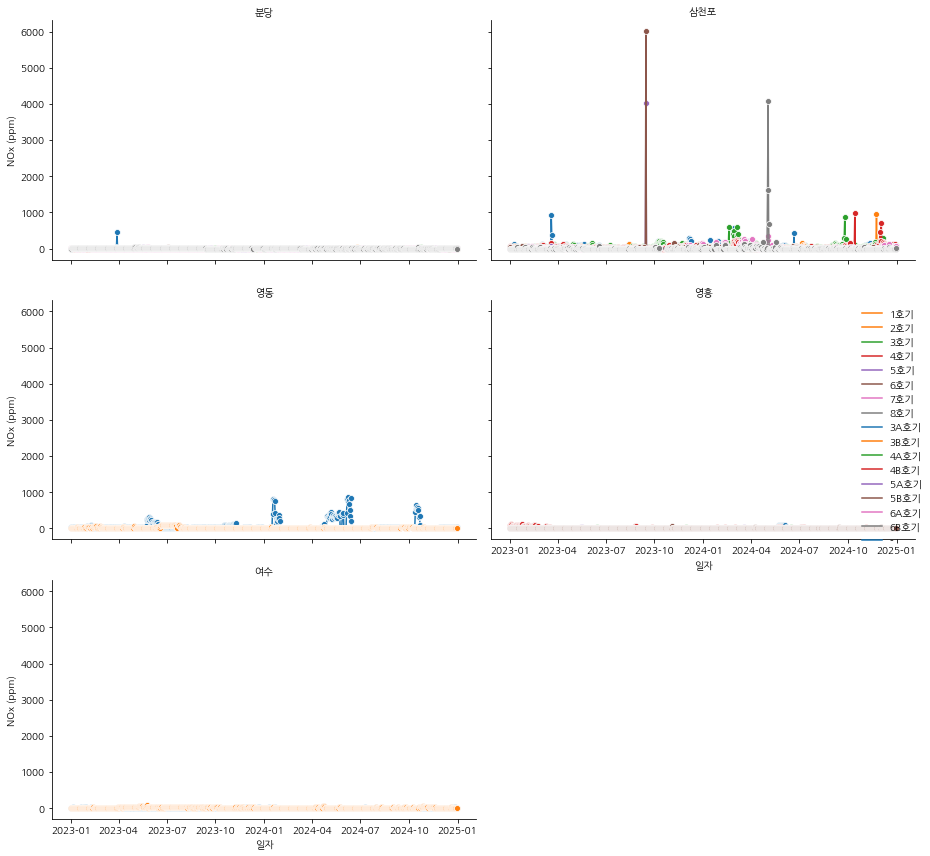

In [63]:
g = sns.FacetGrid(nox_day, col='사업소', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='일자', y='NOX', hue='호기', marker='o')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("일자", "NOx (ppm)")
g.add_legend()
plt.tight_layout()
plt.show()


#### 발전소별 월합산 배출량 (전체 호기 합산)
- 월별 배출량

In [96]:
# 월 컬럼 추가
df_day = nox_day.copy()
# daily_sum['월'] = daily_sum['일자'].dt.to_period('M').astype(str)  # 예: '2024-12'
monthly_sum = daily_sum.groupby(['사업소', '월'])['NOX'].sum().reset_index() 

In [97]:
monthly_sum

,사업소,월,NOX
0,분당,2023-01,1897.19
1,분당,2023-02,1546.34
2,분당,2023-03,1968.32
3,분당,2023-04,1159.09
4,분당,2023-05,1822.84
...,...,...,...
115,영흥,2024-08,1503.91
116,영흥,2024-09,1190.53
117,영흥,2024-10,963.43
118,영흥,2024-11,927.59


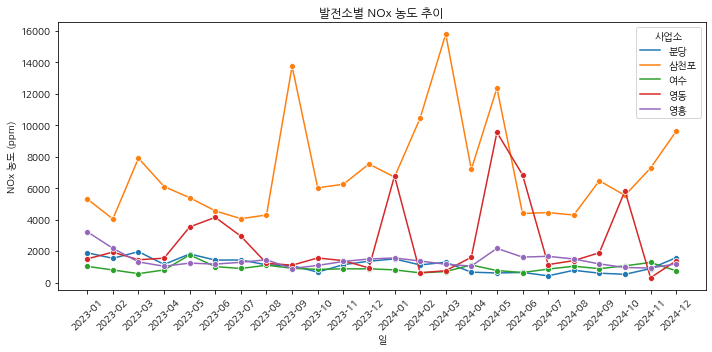

In [191]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sum, x='월', y='NOX', hue='사업소', marker='o')

plt.title('발전소별 NOx 농도 추이')
plt.xlabel('일')
plt.ylabel('NOx 농도 (ppm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [204]:
monthly_sum

,사업소,월,NOX
0,분당,2023-01,1897.19
1,분당,2023-02,1546.34
2,분당,2023-03,1968.32
3,분당,2023-04,1159.09
4,분당,2023-05,1822.84
...,...,...,...
115,영흥,2024-08,1503.91
116,영흥,2024-09,1190.53
117,영흥,2024-10,963.43
118,영흥,2024-11,927.59


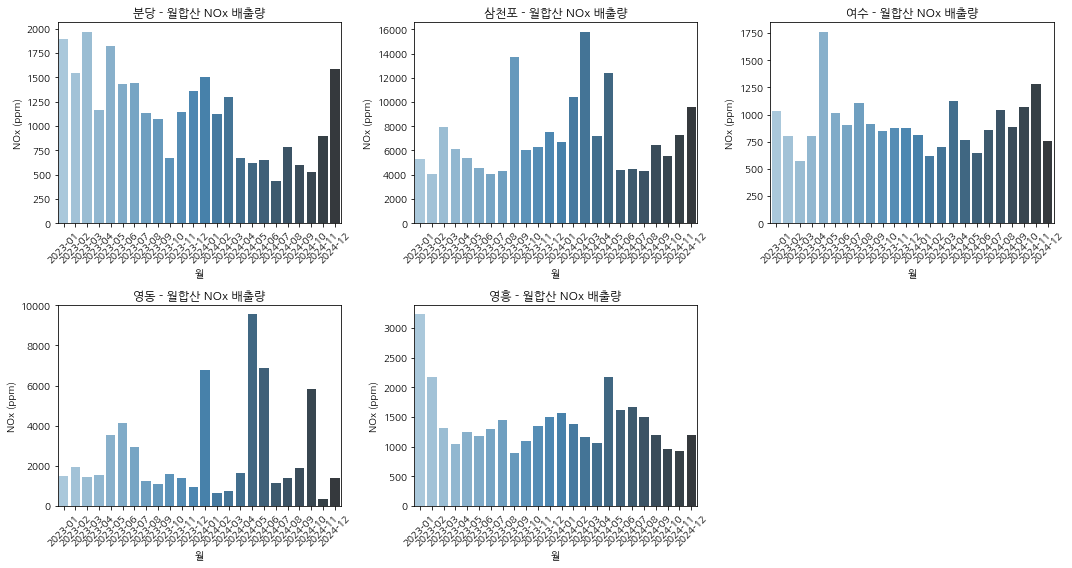

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plants = monthly_sum['사업소'].unique()
n = len(plants)

# subplot 크기 설정 
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # 2D -> 1D로 평탄화

for i, plant in enumerate(plants):
    sub_df = monthly_sum[monthly_sum['사업소'] == plant]

    sns.barplot(data=sub_df, x='월', y='NOX', palette='Blues_d', ax=axes[i])
    axes[i].set_title(f'{plant} - 월합산 NOx 배출량')
    axes[i].set_xlabel('월')
    axes[i].set_ylabel('NOx (ppm)')
    axes[i].tick_params(axis='x', rotation=45)

# 남는 subplot 숨기기 (사업소 개수 < subplot 개수일 경우)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

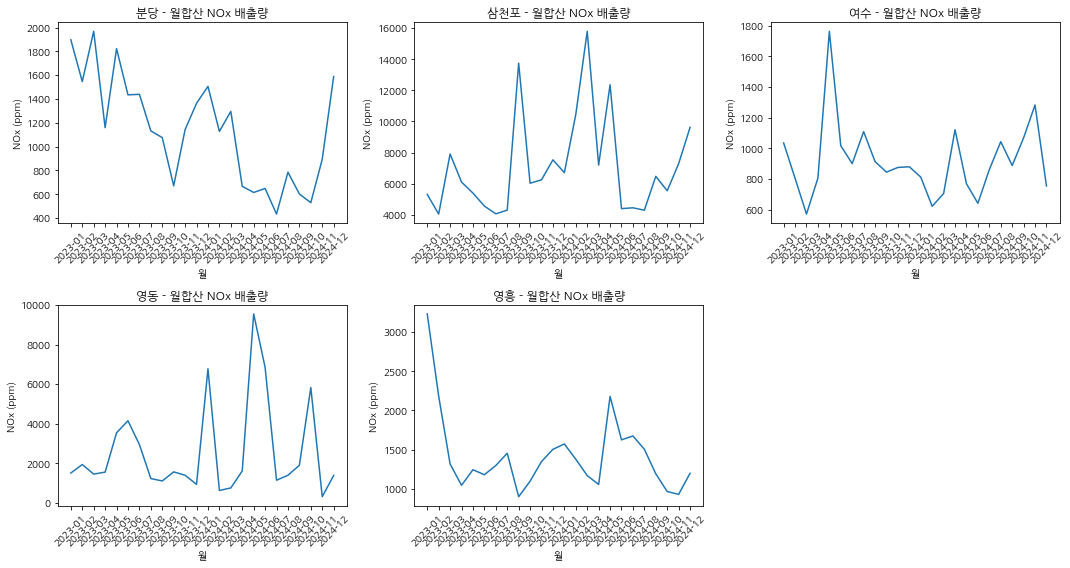

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plants = monthly_sum['사업소'].unique()
n = len(plants)

# subplot 크기 설정 
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # 2D -> 1D로 평탄화

for i, plant in enumerate(plants):
    sub_df = monthly_sum[monthly_sum['사업소'] == plant]

    sns.lineplot(data=sub_df, x='월', y='NOX', palette='Blues_d', ax=axes[i])
    axes[i].set_title(f'{plant} - 월합산 NOx 배출량')
    axes[i].set_xlabel('월')
    axes[i].set_ylabel('NOx (ppm)')
    axes[i].tick_params(axis='x', rotation=45)

# 남는 subplot 숨기기 (사업소 개수 < subplot 개수일 경우)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 사업소 목록
plants = monthly_sum['사업소'].unique()

# 발전소별 그래프 개별 출력
for plant in plants:
    sub_df = monthly_sum[monthly_sum['사업소'] == plant]

    plt.figure(figsize=(10, 4))
    sns.lineplot(data=sub_df, x='월', y='NOX',  marker='o')

    plt.title(f'{plant} - 월별 NOx 일평균')
    plt.xlabel('월')
    plt.ylabel('NOx (ppm)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### 변수 간 상관관계

In [208]:
nox_day.columns

Index(['사업소', '호기', '일자', 'SOX', 'NOX', '먼지', '산소', '유량', '온도'], dtype='object')

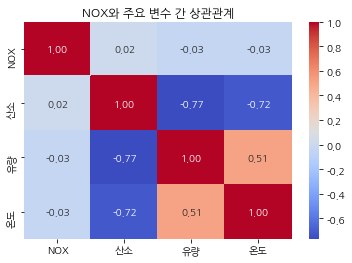

In [213]:
# 결측치 제거 (NOX, 산소, 유량, 온도 기준)
df_corr = nox_day[['NOX', '산소', '유량', '온도']].dropna()

# 상관계수 계산
corr_matrix = df_corr.corr()

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('NOX와 주요 변수 간 상관관계')
plt.show()


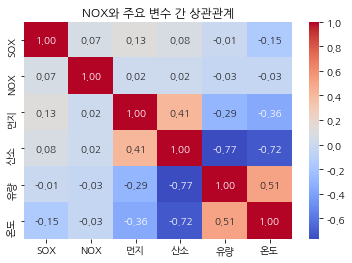

In [209]:
# 결측치 제거 (NOX, 산소, 유량, 온도 기준)
# df_corr = nox_day[['NOX', '산소', '유량', '온도']].dropna()
df_corr = nox_day.copy()

# 상관계수 계산
corr_matrix = df_corr.corr()

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('NOX와 주요 변수 간 상관관계')
plt.show()


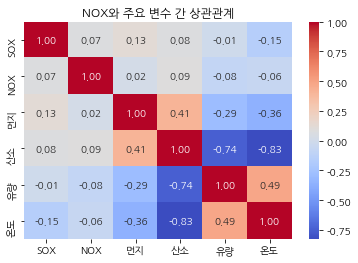

In [210]:
# 결측치 제거 (NOX, 산소, 유량, 온도 기준)
# df_corr = nox_day[['NOX', '산소', '유량', '온도']].dropna()
df_corr = nox_day.copy().dropna()

# 상관계수 계산
corr_matrix = df_corr.corr()

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('NOX와 주요 변수 간 상관관계')
plt.show()


## 기상정보 (weather)
- 여수 날씨 X
- 영흥: '내2리', '내6리', '선재도', '외1리', '외3리'

In [77]:
weather.head()

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,-,20241231,-3.77,66.45,333.13,2.52,NaN,NaN,-3.77,66.45,333.13,2.52,NaN,NaN
1,영동,-,20241231,1.60,27.90,261.88,2.54,0.0,1016.0,1.60,27.90,261.88,2.54,0.0,1016.0
2,영흥,내2리,20241231,-2.34,69.76,296.44,0.85,NaN,NaN,-2.34,69.76,296.44,0.85,NaN,NaN
3,영흥,내6리,20241231,-0.50,68.73,84.40,0.10,NaN,NaN,-0.50,68.73,84.40,0.10,NaN,NaN
4,영흥,선재도,20241231,1.55,69.64,0.00,0.00,0.0,NaN,1.55,69.64,0.00,0.00,0.0,NaN


In [78]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업소     4984 non-null   object 
 1   호기      4984 non-null   object 
 2   일자      4984 non-null   int64  
 3   온도      4983 non-null   float64
 4   습도      4983 non-null   float64
 5   풍향      4983 non-null   float64
 6   풍속      4983 non-null   float64
 7   강수량     1869 non-null   float64
 8   기압      668 non-null    float64
 9   대기안정도   4983 non-null   float64
 10  증발량     4983 non-null   float64
 11  일조시간    4983 non-null   float64
 12  전일강수량   4983 non-null   float64
 13  60분강수량  1869 non-null   float64
 14  금일강수량   668 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 584.2+ KB


In [ ]:
weather

In [123]:
weather[(weather['사업소']=='영흥') & (weather['금일강수량'].notna())]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량


In [126]:
weather[(weather['사업소']=='영흥') & (weather['기압'].notna())]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량


In [122]:
weather[(weather['사업소']=='영흥') & (weather['강수량'].notna())]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
4,영흥,선재도,20241231,1.55,69.64,0.00,0.00,0.0,NaN,1.55,69.64,0.00,0.00,0.0,NaN
11,영흥,선재도,20241230,7.17,90.34,0.00,0.00,0.0,NaN,7.17,90.34,0.00,0.00,0.0,NaN
18,영흥,선재도,20241229,4.15,93.07,0.00,0.00,0.0,NaN,4.15,93.07,0.00,0.00,0.0,NaN
25,영흥,선재도,20241228,0.59,80.50,0.00,0.00,0.0,NaN,0.59,80.50,0.00,0.00,0.0,NaN
32,영흥,선재도,20241227,-1.40,82.05,0.00,0.00,0.0,NaN,-1.40,82.05,0.00,0.00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,영흥,선재도,20230105,1.11,90.44,96.00,0.06,0.0,NaN,1.11,90.44,96.00,0.06,0.0,NaN
4957,영흥,선재도,20230104,0.15,72.31,88.26,0.83,0.0,NaN,0.15,72.31,88.26,0.83,0.0,NaN
4965,영흥,선재도,20230103,-1.48,51.30,188.72,1.19,0.0,NaN,-1.48,51.30,188.72,1.19,0.0,NaN
4973,영흥,선재도,20230102,-3.22,60.37,355.43,3.33,0.0,NaN,-3.22,60.37,355.43,3.33,0.0,NaN


##### 결측치 확인

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사업소     4984 non-null   object        
 1   호기      4984 non-null   object        
 2   일자      4984 non-null   datetime64[ns]
 3   온도      4983 non-null   float64       
 4   습도      4983 non-null   float64       
 5   풍향      4983 non-null   float64       
 6   풍속      4983 non-null   float64       
 7   강수량     1869 non-null   float64       
 8   기압      668 non-null    float64       
 9   대기안정도   4983 non-null   float64       
 10  증발량     4983 non-null   float64       
 11  일조시간    4983 non-null   float64       
 12  전일강수량   4983 non-null   float64       
 13  60분강수량  1869 non-null   float64       
 14  금일강수량   668 non-null    float64       
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 584.2+ KB


In [24]:
weather[(weather['강수량'].isna()) & (weather['전일강수량'].isna())]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
4898,영동,-,2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
weather[(weather['강수량'].isna()) & (weather['사업소']=='분당')].sort_index(ascending=False)[:30]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
4976,분당,-,2023-01-01,-3.96,46.07,325.03,1.51,NaN,NaN,-3.96,46.07,325.03,1.51,NaN,NaN
4968,분당,-,2023-01-02,-7.45,63.39,324.52,1.44,NaN,NaN,-7.45,63.39,324.52,1.44,NaN,NaN
4960,분당,-,2023-01-03,-7.28,56.97,325.07,1.49,NaN,NaN,-7.28,56.97,325.07,1.49,NaN,NaN
4952,분당,-,2023-01-04,-5.12,68.63,324.83,1.50,NaN,NaN,-5.12,68.63,324.83,1.50,NaN,NaN
4944,분당,-,2023-01-05,-4.20,72.47,324.25,1.42,NaN,NaN,-4.20,72.47,324.25,1.42,NaN,NaN
4936,분당,-,2023-01-06,0.38,99.96,326.00,1.59,NaN,NaN,0.38,99.96,326.00,1.59,NaN,NaN
4928,분당,-,2023-01-07,-2.72,94.20,325.73,1.57,NaN,NaN,-2.72,94.20,325.73,1.57,NaN,NaN
4920,분당,-,2023-01-08,1.86,68.79,324.00,1.36,NaN,NaN,1.86,68.79,324.00,1.36,NaN,NaN
4912,분당,-,2023-01-09,-1.76,63.46,324.90,1.45,NaN,NaN,-1.76,63.46,324.90,1.45,NaN,NaN
4904,분당,-,2023-01-10,-1.66,81.52,339.86,3.25,NaN,NaN,-1.66,81.52,339.86,3.25,NaN,NaN


In [20]:
# 전체 날짜 범위 (2년치)
full_dates = pd.date_range(start='2023-01-01', end='2024-12-31')
weather['일자'] = pd.to_datetime(weather['일자'].astype(str), format='%Y%m%d')

missing_dates = full_dates.difference(weather[weather['사업소']=='분당']['일자'].dropna().unique())
missing_df = pd.DataFrame({'빠진_날짜': missing_dates})
missing_df

,빠진_날짜
0,2023-12-13
1,2023-12-14
2,2024-08-07


#### 여수시 데이터 합치기

In [271]:
weather_ys = pd.read_csv('./여수산단_방재기상관측(일별).csv', encoding='cp949')
weather_ys_23 = pd.read_csv('./여수산단_습도_기압(2023).xls', encoding='cp949', sep='\t')
weather_ys_24 = pd.read_csv('./여수산단_습도_기압(2024).xls', encoding='cp949', sep='\t')

In [277]:
weather_ys.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간풍속 시각(hhmi),평균 풍속(m/s),최대 순간 풍속 풍향(deg)
0,766,여수산단,2023-01-01,4.7,2.8,2355,9.0,1333,0.0,14.7,1400,5.4,277.8
1,766,여수산단,2023-01-02,1.4,-1.0,2303,5.8,1432,0.0,12.8,1326,6.8,286.6
2,766,여수산단,2023-01-03,1.1,-1.2,241,4.8,1258,0.0,15.6,1350,7.4,284.2
3,766,여수산단,2023-01-04,2.9,-1.8,621,8.3,1444,0.0,12.9,1215,5.5,283.4
4,766,여수산단,2023-01-05,4.9,1.6,751,9.5,1422,0.0,10.6,1404,3.6,256.6


In [278]:
# 0. 데이터 병합 (23,24년 데이터)
weather_ys_2324 = pd.concat([weather_ys_23, weather_ys_24])

# 1. datetime으로 변환
weather_ys_2324['일시'] = pd.to_datetime(weather_ys_2324['일시'])

# 2. 날짜만 추출하여 새로운 컬럼 생성
weather_ys_2324['일자'] = weather_ys_2324['일시'].dt.date

# 3. 일자별 평균 계산
weather_avg = weather_ys_2324.groupby('일자')[['현지기압(hPa)', '습도(%)']].mean().reset_index()


# 4. weather_ys의 일시도 datetime으로 변환
weather_ys['일시'] = pd.to_datetime(weather_ys['일시'])
weather_ys['일자'] = weather_ys['일시'].dt.date

# 5. 병합 (on='일자')
merged_weather = pd.merge(weather_ys, weather_avg, on='일자', how='left')

# 6. 불필요한 '일자' 컬럼 제거 (선택)
merged_weather.drop(columns=['일자'], inplace=True)
merged_weather.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간풍속 시각(hhmi),평균 풍속(m/s),최대 순간 풍속 풍향(deg),현지기압(hPa),습도(%)
0,766,여수산단,2023-01-01,4.7,2.8,2355,9.0,1333,0.0,14.7,1400,5.4,277.8,1019.841667,51.875000
1,766,여수산단,2023-01-02,1.4,-1.0,2303,5.8,1432,0.0,12.8,1326,6.8,286.6,1020.116667,31.500000
2,766,여수산단,2023-01-03,1.1,-1.2,241,4.8,1258,0.0,15.6,1350,7.4,284.2,1019.070833,46.375000
3,766,여수산단,2023-01-04,2.9,-1.8,621,8.3,1444,0.0,12.9,1215,5.5,283.4,1020.233333,49.083333
4,766,여수산단,2023-01-05,4.9,1.6,751,9.5,1422,0.0,10.6,1404,3.6,256.6,1020.541667,55.458333


In [304]:
# 1. 기존 데이터 일자 변환
df_weather = weather.copy()
df_weather['일자'] = pd.to_datetime(df_weather['일자'].astype(str), format='%Y%m%d').dt.date

# 2. 여수 날씨 데이터 준비
weather_yeosu = merged_weather.copy()
weather_yeosu['일자'] = pd.to_datetime(weather_yeosu['일시']).dt.date

# 3. 필요한 컬럼만 추출 및 이름 통일
yeosu_data = weather_yeosu[[
    '일자', '평균기온(°C)', '습도(%)', '최대 순간 풍속 풍향(deg)',
    '평균 풍속(m/s)', '일강수량(mm)', '현지기압(hPa)'
]].copy()

yeosu_data.rename(columns={
    '평균기온(°C)': '온도',
    '습도(%)': '습도',
    '최대 순간 풍속 풍향(deg)': '풍향',
    '평균 풍속(m/s)': '풍속',
    '일강수량(mm)': '강수량',
    '현지기압(hPa)': '기압'
}, inplace=True)

# 4. 기타 없는 컬럼 추가 (NaN 채움 또는 0으로)
yeosu_data['사업소'] = '여수'
yeosu_data['호기'] = '-'
yeosu_data['대기안정도'] = None
yeosu_data['증발량'] = None
yeosu_data['일조시간'] = None
yeosu_data['전일강수량'] = None 
yeosu_data['60분강수량'] = None
yeosu_data['금일강수량'] = yeosu_data['강수량']  # 또는 None

# 5. 열 순서 맞추기 (df_weather 열 순서에 맞게 정렬)
cols_order = df_weather.columns.tolist()
yeosu_data = yeosu_data[cols_order]

# 6. 기존 데이터에 추가 (concat)
df_weather_extended = pd.concat([df_weather, yeosu_data], ignore_index=True)
df_weather_extended.head()


,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,-,2024-12-31,-3.77,66.45,333.13,2.52,NaN,NaN,-3.77,66.45,333.13,2.52,NaN,NaN
1,영동,-,2024-12-31,1.60,27.90,261.88,2.54,0.0,1016.0,1.6,27.9,261.88,2.54,0.0,1016.0
2,영흥,내2리,2024-12-31,-2.34,69.76,296.44,0.85,NaN,NaN,-2.34,69.76,296.44,0.85,NaN,NaN
3,영흥,내6리,2024-12-31,-0.50,68.73,84.40,0.10,NaN,NaN,-0.5,68.73,84.4,0.1,NaN,NaN
4,영흥,선재도,2024-12-31,1.55,69.64,0.00,0.00,0.0,NaN,1.55,69.64,0.0,0.0,0.0,NaN


In [306]:
# 영흥만 필터링 후, 일자별 평균값 계산
yeongheung_avg = (
    weather[weather['사업소'] == '영흥']
    .groupby('일자')
    .mean(numeric_only=True)
    .reset_index()
)

# '사업소' 컬럼 추가
yeongheung_avg['사업소'] = '영흥'

# 영흥 아닌 데이터만 추출
weather_except_yeongheung = df_weather_extended[df_weather_extended['사업소'] != '영흥']

# 영흥 평균 데이터와 합치기
df1 = pd.concat([weather_except_yeongheung, yeongheung_avg], ignore_index=True)

# 일자순, 사업소순 정렬
df1['일자'] = pd.to_datetime(df1['일자'].astype(str))
df1 = df1.sort_values(['사업소', '일자']).reset_index(drop=True)

df1.head()


,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,-,2023-01-01,-3.96,46.07,325.03,1.51,NaN,NaN,-3.96,46.07,325.03,1.51,NaN,NaN
1,분당,-,2023-01-02,-7.45,63.39,324.52,1.44,NaN,NaN,-7.45,63.39,324.52,1.44,NaN,NaN
2,분당,-,2023-01-03,-7.28,56.97,325.07,1.49,NaN,NaN,-7.28,56.97,325.07,1.49,NaN,NaN
3,분당,-,2023-01-04,-5.12,68.63,324.83,1.50,NaN,NaN,-5.12,68.63,324.83,1.5,NaN,NaN
4,분당,-,2023-01-05,-4.20,72.47,324.25,1.42,NaN,NaN,-4.2,72.47,324.25,1.42,NaN,NaN


In [368]:
df1.to_csv('./기상정보.csv', index=False, encoding='cp949')

In [309]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사업소     3341 non-null   object        
 1   호기      2731 non-null   object        
 2   일자      3341 non-null   datetime64[ns]
 3   온도      3340 non-null   float64       
 4   습도      3340 non-null   float64       
 5   풍향      3340 non-null   float64       
 6   풍속      3337 non-null   float64       
 7   강수량     2598 non-null   float64       
 8   기압      1399 non-null   float64       
 9   대기안정도   2609 non-null   object        
 10  증발량     2609 non-null   object        
 11  일조시간    2609 non-null   object        
 12  전일강수량   2609 non-null   object        
 13  60분강수량  1869 non-null   object        
 14  금일강수량   1397 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(7)
memory usage: 391.6+ KB


In [ ]:
df1[df1['온도'].isna()]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
2072,영동,-,2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
df1[df1['습도'].isna()]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
2072,영동,-,2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
df1[df1['풍속'].isna()]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
1400,여수,-,2023-03-11,14.0,72.000000,248.0,NaN,0.0,1013.775000,None,None,None,None,None,0.0
1466,여수,-,2023-05-16,21.9,69.791667,300.0,NaN,0.0,1003.295833,None,None,None,None,None,0.0
1812,여수,-,2024-04-26,17.1,80.333333,133.0,NaN,0.0,1001.291667,None,None,None,None,None,0.0
2072,영동,-,2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
merged_weather[merged_weather['평균 풍속(m/s)'].isna()]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간풍속 시각(hhmi),평균 풍속(m/s),최대 순간 풍속 풍향(deg),현지기압(hPa),습도(%)
69,766,여수산단,2023-03-11,14.0,8.2,707,21.4,1505,0.0,5.6,1526,NaN,248.0,1013.775000,72.000000
135,766,여수산단,2023-05-16,21.9,15.4,534,29.3,1554,0.0,11.5,1641,NaN,300.0,1003.295833,69.791667
481,766,여수산단,2024-04-26,17.1,13.9,541,22.7,1639,0.0,9.0,1533,NaN,133.0,1001.291667,80.333333


In [322]:
df1[df1['강수량'].isna()]

,사업소,호기,일자,온도,습도,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,-,2023-01-01,-3.960000,46.070000,325.030000,1.510000,NaN,NaN,-3.96,46.07,325.03,1.51,NaN,NaN
1,분당,-,2023-01-02,-7.450000,63.390000,324.520000,1.440000,NaN,NaN,-7.45,63.39,324.52,1.44,NaN,NaN
2,분당,-,2023-01-03,-7.280000,56.970000,325.070000,1.490000,NaN,NaN,-7.28,56.97,325.07,1.49,NaN,NaN
3,분당,-,2023-01-04,-5.120000,68.630000,324.830000,1.500000,NaN,NaN,-5.12,68.63,324.83,1.5,NaN,NaN
4,분당,-,2023-01-05,-4.200000,72.470000,324.250000,1.420000,NaN,NaN,-4.2,72.47,324.25,1.42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,영흥,NaN,2023-07-16,23.250000,96.693333,234.203333,0.500000,NaN,NaN,23.25,96.693333,234.203333,0.5,NaN,NaN
2888,영흥,NaN,2023-07-17,23.556667,98.246667,168.360000,0.656667,NaN,NaN,23.556667,98.246667,168.36,0.656667,NaN,NaN
3187,영흥,NaN,2024-07-19,16.476667,62.576667,189.196667,0.800000,NaN,NaN,16.476667,62.576667,189.196667,0.8,NaN,NaN
3188,영흥,NaN,2024-07-20,17.356667,59.383333,173.403333,3.016667,NaN,NaN,17.356667,59.383333,173.403333,3.016667,NaN,NaN


In [2]:
df1[df1['강수량'] == 0]

NameError: name 'df1' is not defined

#### 기상변수 vs NOx 상관관계

In [135]:
daily_sum.head()

,사업소,일자,NOX,월
0,분당,2023-01-01,60.07,2023-01
1,분당,2023-01-02,64.70,2023-01
2,분당,2023-01-03,67.19,2023-01
3,분당,2023-01-04,71.58,2023-01
4,분당,2023-01-05,74.50,2023-01


In [349]:
merged_df1.columns

Index(['사업소', '일자', 'SOX', 'NOX', '먼지', '산소', '유량', '온도', '월', '호기', '기온',
       '습도', '풍향', '풍속', '강수량', '기압', '대기안정도', '증발량', '일조시간', '전일강수량',
       '60분강수량', '금일강수량'],
      dtype='object')

In [359]:
# df1 일자 -> datetime 형식으로 변환
df1['일자'] = pd.to_datetime(df1['일자'], format='%Y%m%d')
df1 = df1.rename(columns={'온도': '기온'})

# 병합: 일자 + 사업소 기준
merged_df1 = pd.merge(daily_sum, df1, on=['사업소', '일자'], how='left')
# merged_df1 = merged_df1[merged_df1['사업소'] != '여수']
merged_df1.head()

,사업소,일자,SOX,NOX,먼지,산소,유량,온도,월,호기,...,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
0,분당,2023-01-01,0.0,60.07,0.0,134.54,336547.70,751.93,2023-01,-,...,325.03,1.51,NaN,NaN,-3.96,46.07,325.03,1.51,NaN,NaN
1,분당,2023-01-02,0.0,64.70,0.0,132.07,371574.01,802.83,2023-01,-,...,324.52,1.44,NaN,NaN,-7.45,63.39,324.52,1.44,NaN,NaN
2,분당,2023-01-03,0.0,67.19,0.0,131.91,378196.20,803.99,2023-01,-,...,325.07,1.49,NaN,NaN,-7.28,56.97,325.07,1.49,NaN,NaN
3,분당,2023-01-04,0.0,71.58,0.0,129.00,415934.83,835.27,2023-01,-,...,324.83,1.50,NaN,NaN,-5.12,68.63,324.83,1.5,NaN,NaN
4,분당,2023-01-05,0.0,74.50,0.0,128.45,412505.64,858.29,2023-01,-,...,324.25,1.42,NaN,NaN,-4.2,72.47,324.25,1.42,NaN,NaN


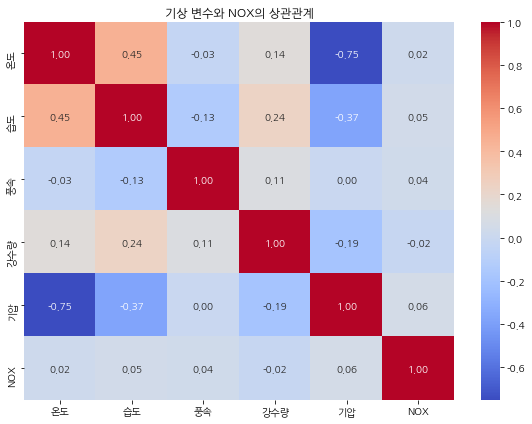

In [324]:
# 기상 변수만 따로 선택
weather_vars = ['온도', '습도', '풍속', '강수량', '기압']

# 상관계수 계산
corrs = merged_df1[weather_vars + ['NOX']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corrs, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("기상 변수와 NOX의 상관관계")
plt.tight_layout()
plt.show()


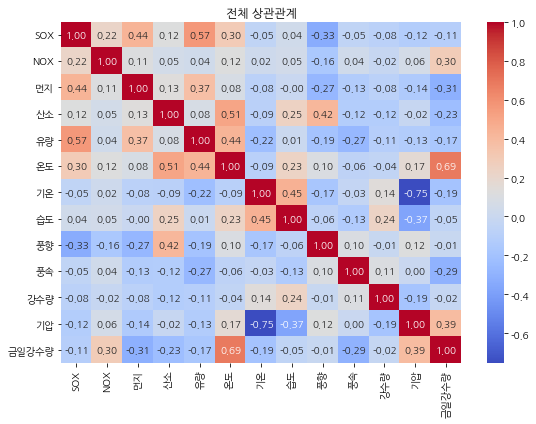

In [351]:
# 상관계수 계산
corrs = merged_df1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corrs, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("전체 상관관계")
plt.tight_layout()
plt.show()


#### 발전소별 기상변수 vs 배출량 상관관계

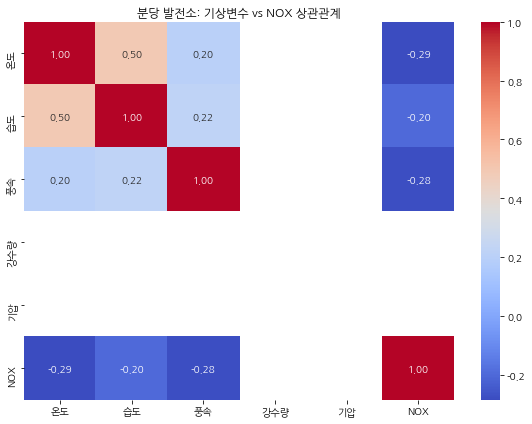

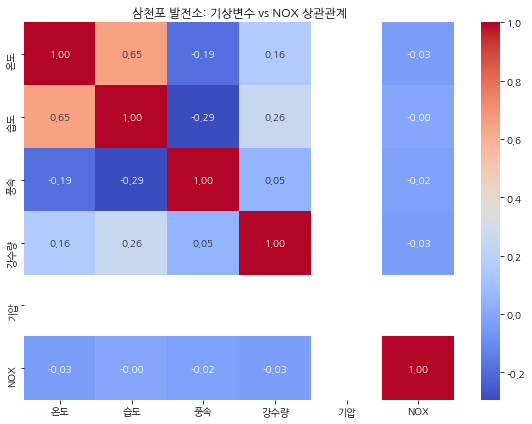

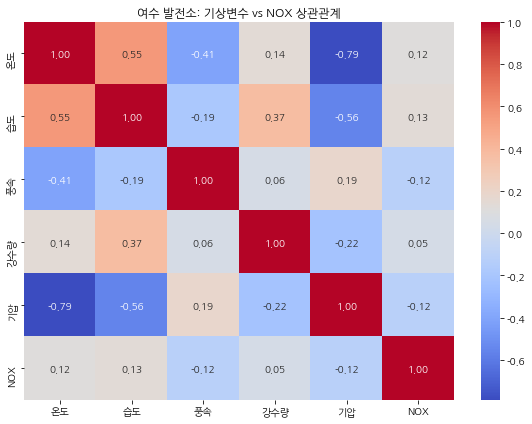

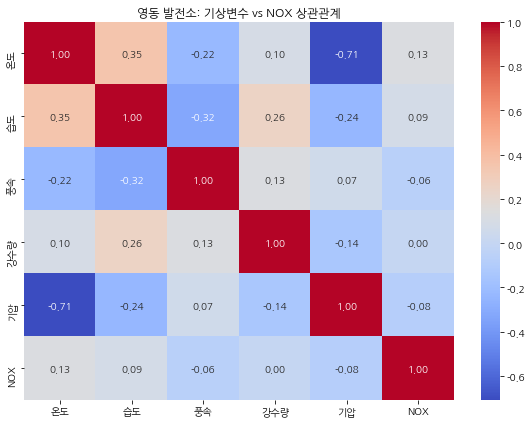

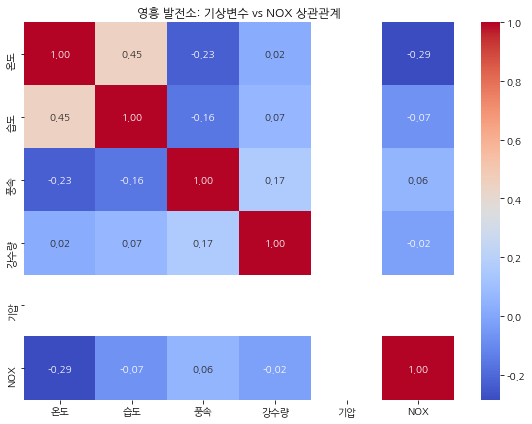

In [325]:
weather_vars = ['온도', '습도', '풍속', '강수량', '기압']

for plant, group in merged_df1.groupby('사업소'):
    corr = group[weather_vars + ['NOX']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f"{plant} 발전소: 기상변수 vs NOX 상관관계")
    plt.tight_layout()
    plt.show()



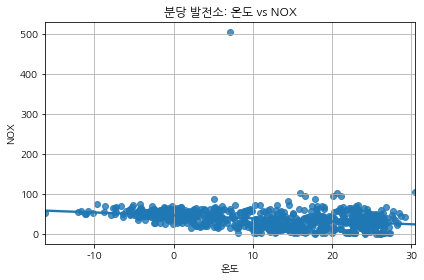

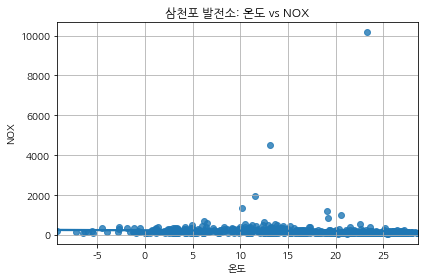

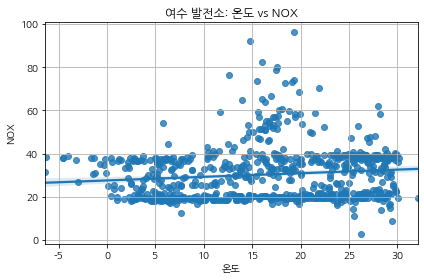

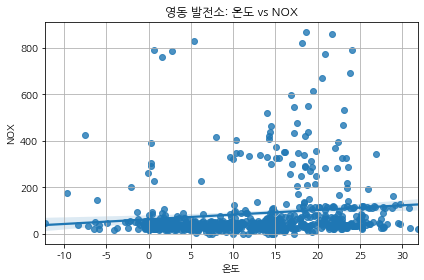

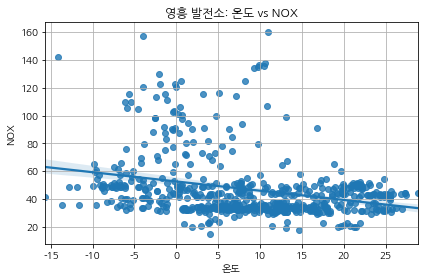

In [326]:
for plant, group in merged_df1.groupby('사업소'):
    plt.figure(figsize=(6, 4))
    sns.regplot(x='온도', y='NOX', data=group)
    plt.title(f'{plant} 발전소: 온도 vs NOX')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### NOX & 온도/풍속 추이

##### 이상치 처리

In [ ]:
# df1 일자 -> datetime 형식으로 변환
df1['일자'] = pd.to_datetime(df1['일자'], format='%Y%m%d')
df1 = df1.rename(columns={'온도': '기온'})

# 병합: 일자 + 사업소 기준
merged_df1 = pd.merge(daily_sum, df1, on=['사업소', '일자'], how='left')
# merged_df1 = merged_df1[merged_df1['사업소'] != '여수']
merged_df1.head()

In [352]:
# IQR 계산
q1 = merged_df1['NOX'].quantile(0.25)
q3 = merged_df1['NOX'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# 앞뒤 값으로 대체(시계열)
merged_df1['NOX'] = merged_df1['NOX'].mask(merged_df1['NOX'] > upper_bound).interpolate(method='linear')


In [361]:
# NOX 큰 순서대로 상위 10개 인덱스 찾기
top10_idx = merged_df1['NOX'].nlargest(10).index

# 해당 인덱스를 NaN으로 설정 (임시로 결측 처리)
merged_df1.loc[top10_idx, 'NOX'] = None

# 선형 보간 (시계열일 경우 'method="time"'도 가능)
merged_df1['NOX'] = merged_df1['NOX'].interpolate()

In [353]:
merged_df1.loc[merged_df1['NOX'].idxmax()]

사업소                       삼천포
일자        2023-11-14 00:00:00
SOX                    120.53
NOX                    175.89
먼지                     356.79
산소                     108.85
유량                   314358.9
온도                     366.04
월                     2023-11
호기                          -
기온                       8.12
습도                      63.93
풍향                       76.9
풍속                       2.66
강수량                       0.0
기압                        NaN
대기안정도                    8.12
증발량                     63.93
일조시간                     76.9
전일강수량                    2.66
60분강수량                    0.0
금일강수량                     NaN
Name: 1045, dtype: object

In [354]:
merged_df1[(merged_df1['일자'] >  '2023-09-10 00:00:00') & (merged_df1['일자'] <  '2023-09-20 00:00:00') & (merged_df1['사업소'] ==  '삼천포')]

,사업소,일자,SOX,NOX,먼지,산소,유량,온도,월,호기,...,풍향,풍속,강수량,기압,대기안정도,증발량,일조시간,전일강수량,60분강수량,금일강수량
981,삼천포,2023-09-11,123.28,125.70,559.85,94.09,356543.53,545.33,2023-09,-,...,81.14,2.25,0.00,NaN,23.71,94.9,81.14,2.25,0.0,NaN
982,삼천포,2023-09-12,115.02,128.00,238.25,77.51,467417.25,613.73,2023-09,-,...,81.67,2.71,0.00,NaN,22.95,91.11,81.67,2.71,0.0,NaN
983,삼천포,2023-09-13,126.61,126.01,234.90,76.46,486889.95,621.13,2023-09,-,...,63.84,2.64,0.00,NaN,24.95,91.0,63.84,2.64,0.0,NaN
984,삼천포,2023-09-14,113.80,128.19,227.57,77.38,453095.88,604.07,2023-09,-,...,68.15,1.45,6.25,NaN,23.26,93.49,68.15,1.45,6.25,NaN
985,삼천포,2023-09-15,120.79,112.12,230.91,78.17,444197.25,602.70,2023-09,-,...,77.25,2.05,1.50,NaN,23.33,98.0,77.25,2.05,1.5,NaN
986,삼천포,2023-09-16,67.42,96.05,348.02,106.58,338013.65,472.11,2023-09,-,...,136.17,2.77,33.75,NaN,23.85,97.11,136.17,2.77,33.75,NaN
987,삼천포,2023-09-17,74.84,98.80,326.18,107.85,317287.92,450.24,2023-09,-,...,42.02,1.30,18.25,NaN,24.05,94.03,42.02,1.3,18.25,NaN
988,삼천포,2023-09-18,94.18,172.47,249.63,86.40,416353.06,575.91,2023-09,-,...,72.53,2.94,0.00,NaN,23.03,96.9,72.53,2.94,0.0,NaN
989,삼천포,2023-09-19,128.06,126.98,241.47,77.50,463560.33,609.11,2023-09,-,...,73.39,3.19,0.00,NaN,21.57,95.92,73.39,3.19,0.0,NaN


##### 그래프 그리기

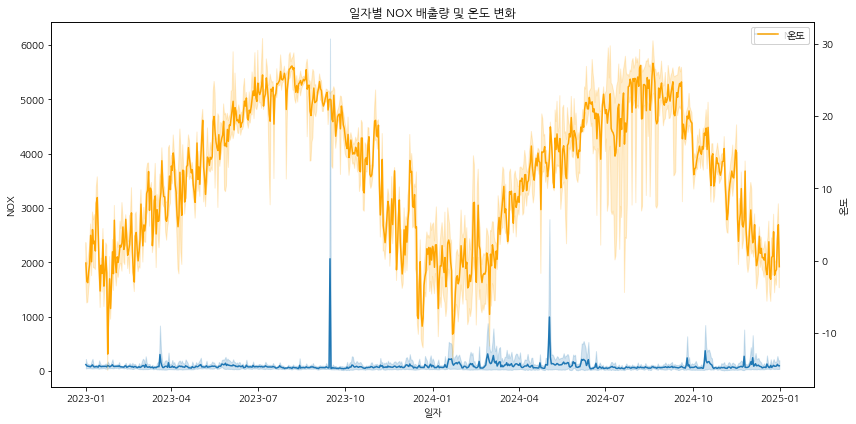

In [139]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# NOX
sns.lineplot(data=merged_df1, x='일자', y='NOX', label='NOX')

# 온도 (보조축)
ax2 = plt.twinx()
sns.lineplot(data=merged_df1, x='일자', y='온도', ax=ax2, color='orange', label='온도')

plt.title('일자별 NOX 배출량 및 온도 변화')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


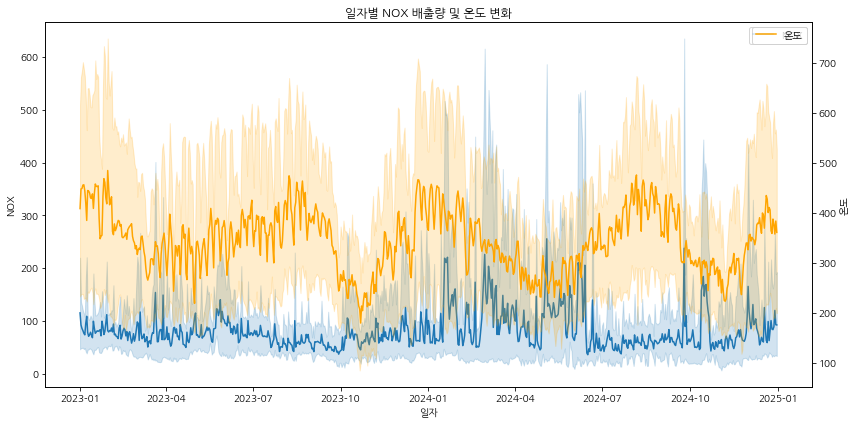

In [ ]:
# 이상치 처리 후 그래프

import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# NOX
sns.lineplot(data=merged_df1, x='일자', y='NOX', label='NOX')

# 온도 (보조축)
ax2 = plt.twinx()
sns.lineplot(data=merged_df1, x='일자', y='온도', ax=ax2, color='orange', label='온도')

plt.title('일자별 NOX 배출량 및 온도 변화')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [327]:
import statsmodels.api as sm

# 결측치 제거
weather_vars = ['온도', '습도', '풍속', '강수량', '기압']
reg_df = merged_df1[['NOX'] + weather_vars].dropna()

X = reg_df[weather_vars]
y = reg_df['NOX']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모델 학습
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     8.201
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.21e-07
Time:                        14:09:59   Log-Likelihood:                -8336.7
No. Observations:                1394   AIC:                         1.669e+04
Df Residuals:                    1388   BIC:                         1.672e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1984.2021    524.284     -3.785      0.0

In [364]:
import statsmodels.api as sm

# 결측치 제거
weather_vars = ['온도', '습도', '풍속', '강수량', '기압']
reg_df = merged_df1[['NOX'] + weather_vars].dropna()

X = reg_df[weather_vars]
y = reg_df['NOX']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모델 학습
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.356
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           8.12e-07
Time:                        16:01:51   Log-Likelihood:                -8338.8
No. Observations:                1394   AIC:                         1.669e+04
Df Residuals:                    1388   BIC:                         1.672e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1073.0952    360.552     -2.976      0.0

## 발전소 주변 농도 (concentration)

In [79]:
concentration.head()

,사업소,호기,일자,아황산가스,이산화질소,미세먼지,초미세먼지,오존,일산화탄소
0,영흥,내2리,20241231,NaN,0.01,57.00,42.00,0.03,NaN
1,영흥,내6리,20241231,NaN,0.01,13.01,8.00,0.03,NaN
2,영흥,선재도,20241231,NaN,0.01,12.15,7.47,0.03,NaN
3,영흥,외1리,20241231,NaN,0.01,10.93,6.69,0.03,NaN
4,영흥,외3리,20241231,NaN,0.01,10.00,0.51,0.03,NaN


In [160]:
con = concentration.copy()
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업소     2984 non-null   object 
 1   호기      2984 non-null   object 
 2   일자      2984 non-null   int64  
 3   아황산가스   0 non-null      float64
 4   이산화질소   2984 non-null   float64
 5   미세먼지    2984 non-null   float64
 6   초미세먼지   2984 non-null   float64
 7   오존      2984 non-null   float64
 8   일산화탄소   0 non-null      float64
dtypes: float64(6), int64(1), object(2)
memory usage: 209.9+ KB


In [161]:
con = con.drop(['아황산가스', '일산화탄소'], axis=1)
con.head()

,사업소,호기,일자,이산화질소,미세먼지,초미세먼지,오존
0,영흥,내2리,20241231,0.01,57.00,42.00,0.03
1,영흥,내6리,20241231,0.01,13.01,8.00,0.03
2,영흥,선재도,20241231,0.01,12.15,7.47,0.03
3,영흥,외1리,20241231,0.01,10.93,6.69,0.03
4,영흥,외3리,20241231,0.01,10.00,0.51,0.03


In [162]:
con.groupby(['사업소', '호기']).count()

일자  이산화질소  미세먼지  초미세먼지   오존
사업소 호기                               
영흥  내2리  605    605   605    605  605
    내6리  609    609   609    609  609
    선재도  598    598   598    598  598
    외1리  568    568   568    568  568
    외3리  604    604   604    604  604

In [163]:
con['사업소'].unique()

array(['영흥'], dtype=object)

## 연료 소비실적 (fuel)
- 영동: 우드펠릿
- 분당: LNG
- 나머지: 석탄
- 안산 데이터 drop

In [222]:
fuel = pd.read_excel('./한국남동발전_연료소비실적.xls')

In [223]:
fuel['일자'] = pd.to_datetime(fuel['일자'].astype(str), format='%Y%m')
fuel['일자'] = fuel['일자'].dt.strftime('%Y-%m')
fuel.head()

,사업소,호기,일자,유연탄,무연탄,계(석탄),유류,LNG,고형연료,우드펠릿
0,분당연료전지,소계,2024-12,0,0,0,0,4218,0,0
1,분당화력,소계,2024-12,0,0,0,0,70370,0,0
2,삼천포,소계,2024-12,407691,0,407691,1606,0,1996,0
3,안산연료전지,소계,2024-12,0,0,0,0,261,0,0
4,여수,소계,2024-12,161071,0,161071,1313,0,0,0


In [64]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업소     192 non-null    object
 1   호기      192 non-null    object
 2   일자      192 non-null    object
 3   유연탄     192 non-null    int64 
 4   무연탄     192 non-null    int64 
 5   계(석탄)   192 non-null    int64 
 6   유류      192 non-null    int64 
 7   LNG     192 non-null    int64 
 8   고형연료    192 non-null    int64 
 9   우드펠릿    192 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 15.1+ KB


In [220]:
fuel.describe()

,일자,유연탄,무연탄,계(석탄),유류,LNG,고형연료,우드펠릿
count,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000,192.000000
mean,202356.500000,154356.114583,0.0,154356.114583,572.432292,4621.171875,298.177083,9601.093750
std,50.250055,253554.490876,0.0,253554.490876,1063.688207,14071.480001,865.285898,26827.409881
min,202301.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202306.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202356.500000,0.000000,0.0,0.000000,0.000000,86.000000,0.000000,0.000000
75%,202406.250000,217692.250000,0.0,217692.250000,1005.500000,1261.500000,0.000000,0.000000
max,202412.000000,920026.000000,0.0,920026.000000,6598.000000,86890.000000,4243.000000,114944.000000


In [217]:
fuel.groupby('사업소').sum()

,일자,유연탄,무연탄,계(석탄),유류,LNG,고형연료,우드펠릿
사업소,,,,,,,,
분당연료전지,4856556,0,0,0,0,60807,0,0
분당화력,4856556,0,0,0,0,793464,0,0
삼천포,4856556,9019712,0,9019712,33862,0,57250,0
안산연료전지,4856556,0,0,0,0,5616,0,0
여수,4856556,3254010,0,3254010,20451,0,0,0
여수연료전지,4856556,0,0,0,0,27378,0,0
영동,4856556,0,0,0,3968,0,0,1843410
영흥,4856556,17362652,0,17362652,51626,0,0,0


In [221]:
fuel['사업소'].unique()

array(['분당연료전지', '분당화력', '삼천포', '안산연료전지', '여수', '여수연료전지', '영동', '영흥'],
      dtype=object)

#### 전처리

In [371]:
df3 = fuel.copy()
df3 = df3[df3['사업소'] != '안산연료전지']
df3.head()


,사업소,호기,일자,유연탄,무연탄,계(석탄),유류,LNG,고형연료,우드펠릿
0,분당연료전지,소계,2024-12,0,0,0,0,4218,0,0
1,분당화력,소계,2024-12,0,0,0,0,70370,0,0
2,삼천포,소계,2024-12,407691,0,407691,1606,0,1996,0
4,여수,소계,2024-12,161071,0,161071,1313,0,0,0
5,여수연료전지,소계,2024-12,0,0,0,0,1221,0,0


In [372]:
df3['사업소'].unique()

array(['분당연료전지', '분당화력', '삼천포', '여수', '여수연료전지', '영동', '영흥'], dtype=object)

In [374]:
df3.to_csv('./연료소비실적(그룹화 전).csv', index=False, encoding='cp949')
df3.to_excel('./연료소비실적(그룹화 전).xls', index=False, encoding='cp949')

<ipython-input-374-7b1073a47a62>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df3.to_excel('./연료소비실적(그룹화 전).xls', index=False, encoding='cp949')


In [375]:
# 1. 사업소 통합
df3['사업소'] = df3['사업소'].replace({
    '분당연료전지': '분당',
    '분당화력': '분당',
    '여수연료전지': '여수'
})

# 2. 그룹화 및 합계 계산
df_grouped = df3.groupby(['사업소', '일자'], as_index=False).sum()

# 3. 결과 확인
print(df_grouped)


    사업소       일자     유연탄  무연탄   계(석탄)    유류    LNG  고형연료  우드펠릿
0    분당  2023-01       0    0       0     0  90933     0     0
1    분당  2023-02       0    0       0     0  69621     0     0
2    분당  2023-03       0    0       0     0  44796     0     0
3    분당  2023-04       0    0       0     0  17952     0     0
4    분당  2023-05       0    0       0     0   9575     0     0
..   ..      ...     ...  ...     ...   ...    ...   ...   ...
115  영흥  2024-08  856874    0  856874  6598      0     0     0
116  영흥  2024-09  679766    0  679766  4211      0     0     0
117  영흥  2024-10  660493    0  660493    81      0     0     0
118  영흥  2024-11  592313    0  592313   430      0     0     0
119  영흥  2024-12  680805    0  680805   513      0     0     0

[120 rows x 9 columns]


In [376]:
df_grouped.to_csv('./연료소비실적(그룹화 후).csv', index=False, encoding='cp949')
df_grouped.to_excel('./연료소비실적(그룹화 후).xls', index=False, encoding='cp949')

<ipython-input-376-b14170bdcdc2>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_grouped.to_excel('./연료소비실적(그룹화 후).xls', index=False, encoding='cp949')


In [68]:
# 연료 종류만 따로
fuel_cols = ['유연탄', '무연탄', '유류', 'LNG', '고형연료', '우드펠릿']

# 발전소별, 연료별 총합 계산
df_plot = df_grouped.groupby('사업소')[fuel_cols].sum()
df_plot

,유연탄,무연탄,유류,LNG,고형연료,우드펠릿
사업소,,,,,,
분당,0,0,0,854271,0,0
삼천포,9019712,0,33862,0,57250,0
여수,3254010,0,20451,27378,0,0
영동,0,0,3968,0,0,1843410
영흥,17362652,0,51626,0,0,0


#### 연료 소비실적 시각화

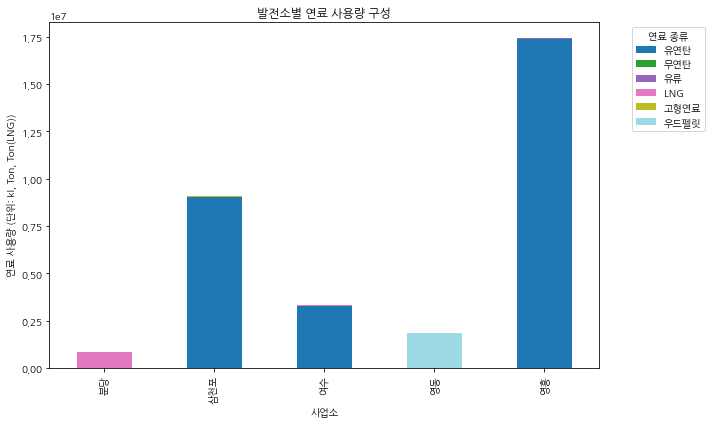

In [ ]:
# stacked bar plot
df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('발전소별 연료 사용량 구성')
plt.xlabel('사업소')
plt.ylabel('연료 사용량 (단위: kl, Ton, Ton(LNG))')
plt.legend(title='연료 종류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


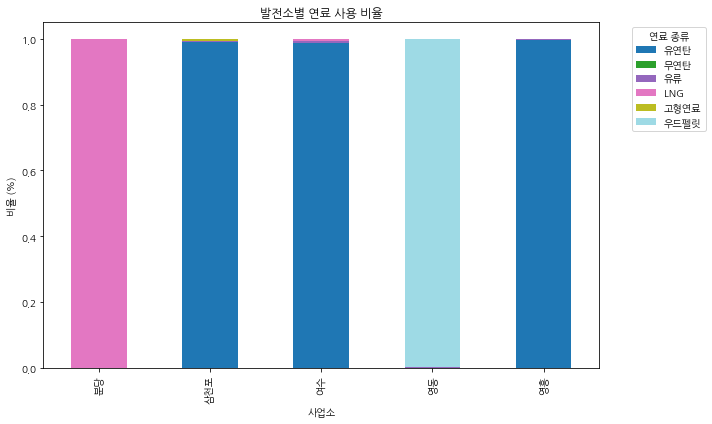

In [242]:
# 비율로 변환
df_ratio = df_plot.div(df_plot.sum(axis=1), axis=0)  # 행 기준 비율

df_ratio.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('발전소별 연료 사용 비율')
plt.ylabel('비율 (%)')
plt.legend(title='연료 종류', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


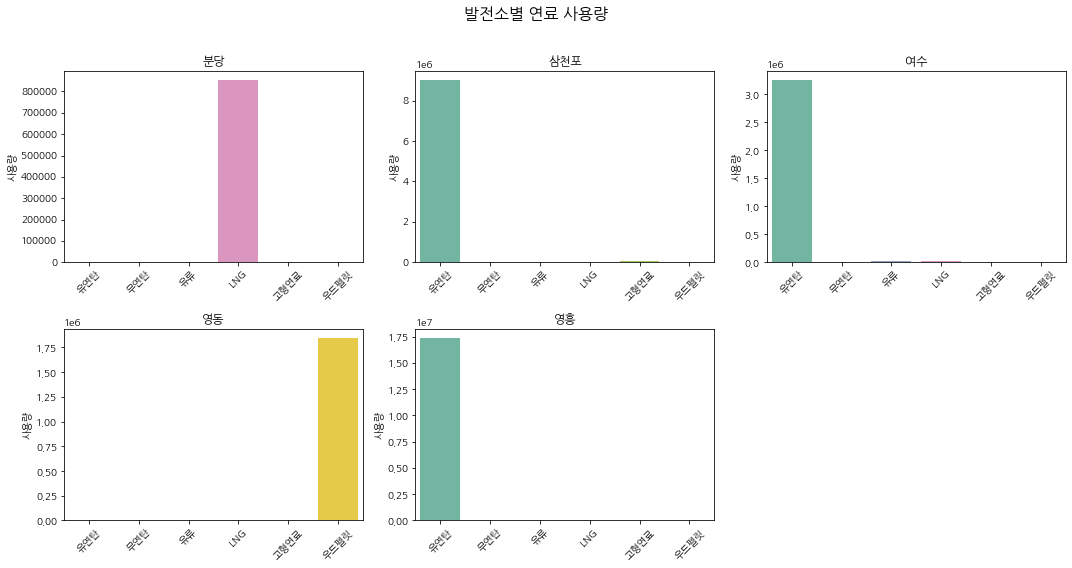

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 1. melt로 long-format 데이터 만들기
df_melted = df_plot.reset_index().melt(
    id_vars='사업소', var_name='연료', value_name='사용량'
)

# 2. 발전소 리스트
plants = df_melted['사업소'].unique()
n = len(plants)

# 3. subplot 배치 설정
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

# 4. 발전소별 subplot 그리기
for i, plant in enumerate(plants):
    sub_df = df_melted[df_melted['사업소'] == plant]
    
    sns.barplot(data=sub_df, x='연료', y='사용량', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{plant}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('사용량')
    axes[i].tick_params(axis='x', rotation=45)


# 남는 subplot 숨기기 (발전소 수 < subplot 수)
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('발전소별 연료 사용량', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
plt.show()


In [79]:
df_long = df3.melt(id_vars=['사업소', '호기', '일자'], 
                  value_vars=['유연탄', '무연탄', '계(석탄)', '유류', 'LNG', '고형연료', '우드펠릿'],
                  var_name='연료종류', value_name='사용량').sort_values(by=['사업소', '일자']).reset_index(drop=True)
df_long

,사업소,호기,일자,연료종류,사용량
0,분당,소계,2023-01,유연탄,0
1,분당,소계,2023-01,유연탄,0
2,분당,소계,2023-01,무연탄,0
3,분당,소계,2023-01,무연탄,0
4,분당,소계,2023-01,계(석탄),0
...,...,...,...,...,...
1171,영흥,소계,2024-12,계(석탄),680805
1172,영흥,소계,2024-12,유류,513
1173,영흥,소계,2024-12,LNG,0
1174,영흥,소계,2024-12,고형연료,0


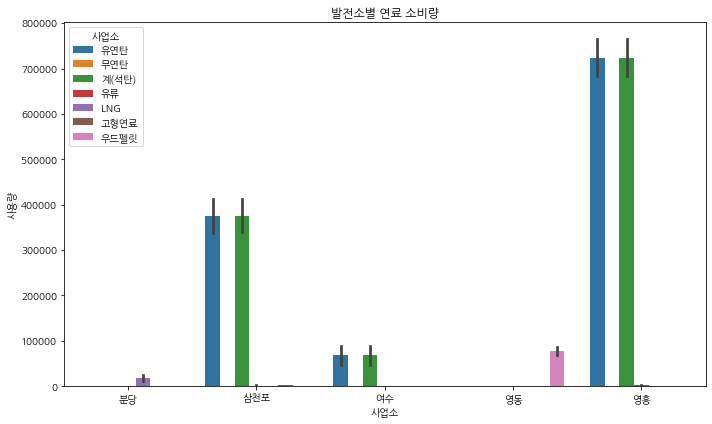

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='사업소', y='사용량', hue='연료종류', dodge=True)

plt.title('발전소별 연료 소비량')
plt.xlabel('사업소')
plt.ylabel('사용량')
plt.legend(title='사업소')
plt.tight_layout()
plt.show()

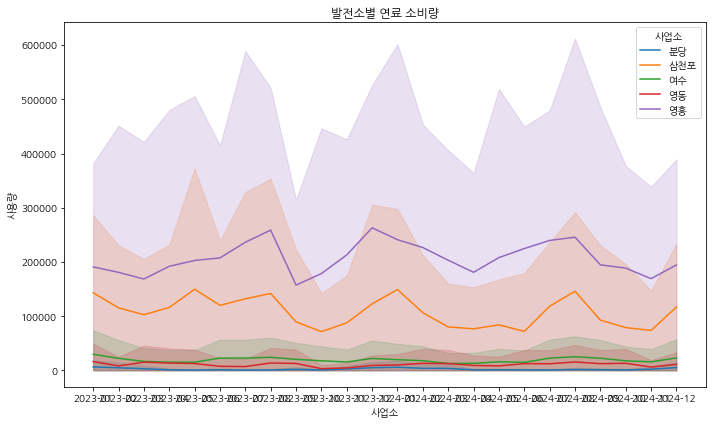

In [85]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='일자', y='사용량', hue='사업소')

plt.title('발전소별 연료 소비량')
plt.xlabel('사업소')
plt.ylabel('사용량')
plt.legend(title='사업소')
plt.tight_layout()
plt.show()

In [80]:
df_long.head()

,사업소,호기,일자,연료종류,사용량
0,분당,소계,2023-01,유연탄,0
1,분당,소계,2023-01,유연탄,0
2,분당,소계,2023-01,무연탄,0
3,분당,소계,2023-01,무연탄,0
4,분당,소계,2023-01,계(석탄),0


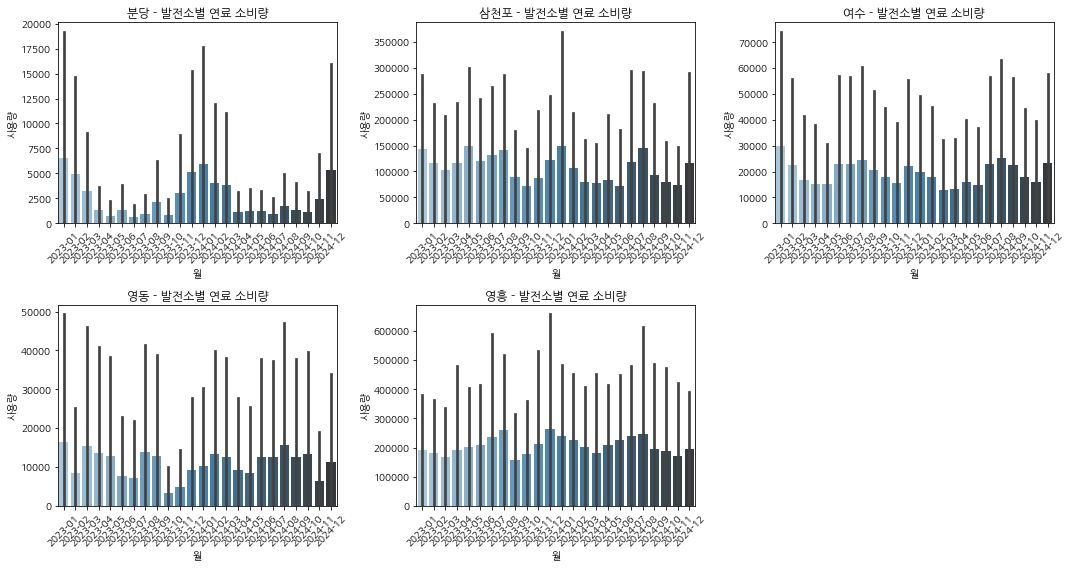

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plants = df_long['사업소'].unique()
n = len(plants)

# subplot 크기 설정 
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # 2D -> 1D로 평탄화

for i, plant in enumerate(plants):
    sub_df = df_long[df_long['사업소'] == plant]

    sns.barplot(data=sub_df, x='일자', y='사용량', palette='Blues_d', ax=axes[i])
    axes[i].set_title(f'{plant} - 발전소별 연료 소비량')
    axes[i].set_xlabel('월')
    axes[i].set_ylabel('사용량')
    axes[i].tick_params(axis='x', rotation=45)

# 남는 subplot 숨기기 (사업소 개수 < subplot 개수일 경우)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### NOx-연료 소비량 상관관계

In [ ]:
# 열 이름 맞추기
df_grouped = df_grouped.rename(columns={'일자': '월'})

# 병합
merged_df = pd.merge(df_grouped, monthly_sum, on=['사업소', '월'])

In [99]:
merged_df

,사업소,월,유연탄,무연탄,계(석탄),유류,LNG,고형연료,우드펠릿,NOX
0,분당,2023-01,0,0,0,0,90933,0,0,1897.19
1,분당,2023-02,0,0,0,0,69621,0,0,1546.34
2,분당,2023-03,0,0,0,0,44796,0,0,1968.32
3,분당,2023-04,0,0,0,0,17952,0,0,1159.09
4,분당,2023-05,0,0,0,0,9575,0,0,1822.84
...,...,...,...,...,...,...,...,...,...,...
115,영흥,2024-08,856874,0,856874,6598,0,0,0,1503.91
116,영흥,2024-09,679766,0,679766,4211,0,0,0,1190.53
117,영흥,2024-10,660493,0,660493,81,0,0,0,963.43
118,영흥,2024-11,592313,0,592313,430,0,0,0,927.59


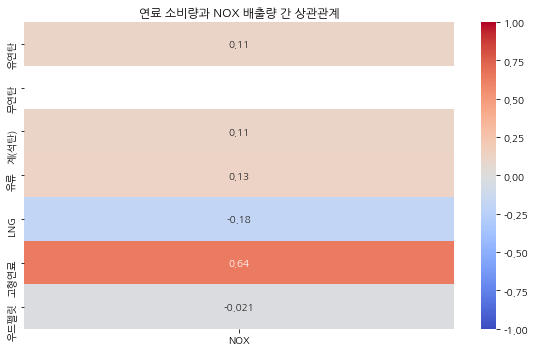

In [103]:
fuel_cols = ['유연탄', '무연탄', '계(석탄)', '유류', 'LNG', '고형연료', '우드펠릿']

# 연료 + NOX만 따로 추출해서 상관관계 확인
corr_matrix = merged_df[fuel_cols + ['NOX']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix[['NOX']].drop('NOX'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('연료 소비량과 NOX 배출량 간 상관관계')
plt.tight_layout()
plt.show()


In [106]:
fuel_cols = ['유연탄', '무연탄', '계(석탄)', '유류', 'LNG', '고형연료', '우드펠릿']
result_dict = {}

# 발전소(사업소)별로 그룹 나눠서
for plant, group in merged_df.groupby('사업소'):
    # 연료 + NOX만 추출
    sub_df = group[fuel_cols + ['NOX']]
    
    # 상관계수 계산
    corr = sub_df.corr()['NOX'].drop('NOX')  # NOX와의 상관만
    result_dict[plant] = corr

plant_corr_df = pd.DataFrame(result_dict).T  # 행: 발전소, 열: 연료종류
plant_corr_df.index.name = '사업소'

print(plant_corr_df)

          유연탄  무연탄     계(석탄)        유류       LNG      고형연료      우드펠릿
사업소                                                                 
분당        NaN  NaN       NaN       NaN  0.581337       NaN       NaN
삼천포 -0.400632  NaN -0.400632 -0.072252       NaN -0.293997       NaN
여수   0.027113  NaN  0.027113 -0.022617 -0.420100       NaN       NaN
영동        NaN  NaN       NaN  0.567894       NaN       NaN -0.090867
영흥   0.179414  NaN  0.179414  0.122806       NaN       NaN       NaN


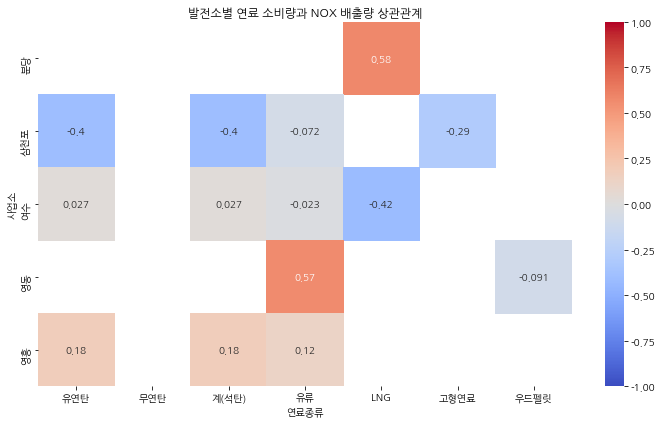

In [107]:
plt.figure(figsize=(10, 6))
sns.heatmap(plant_corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('발전소별 연료 소비량과 NOX 배출량 상관관계')
plt.ylabel('사업소')
plt.xlabel('연료종류')
plt.tight_layout()
plt.show()


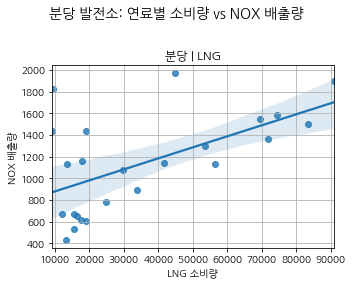

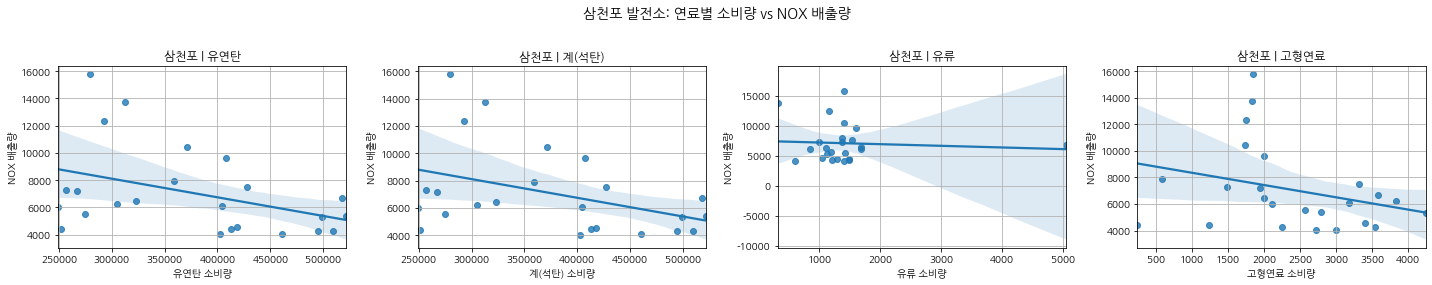

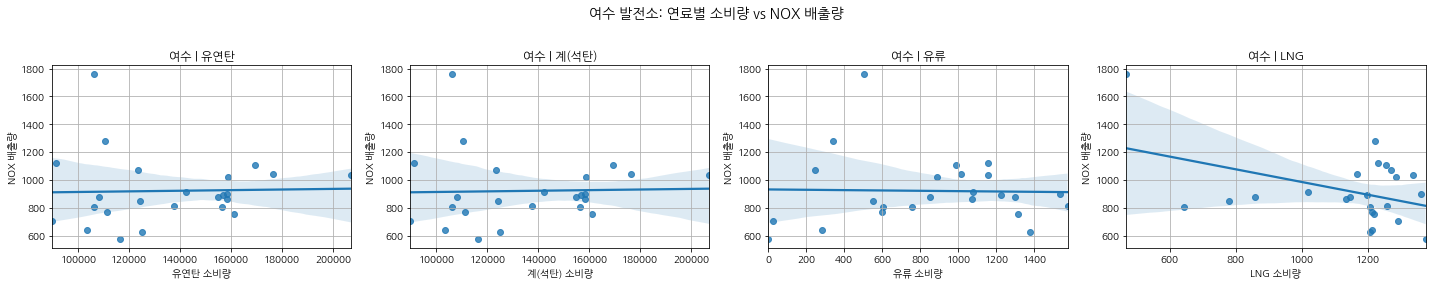

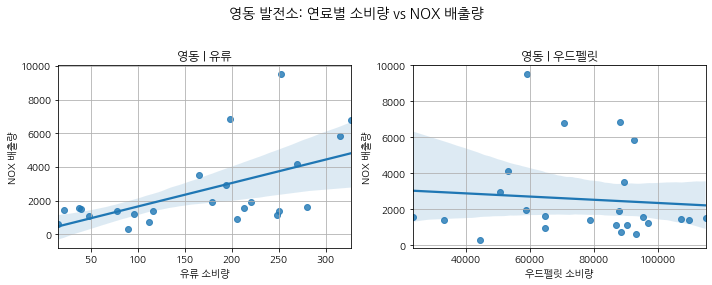

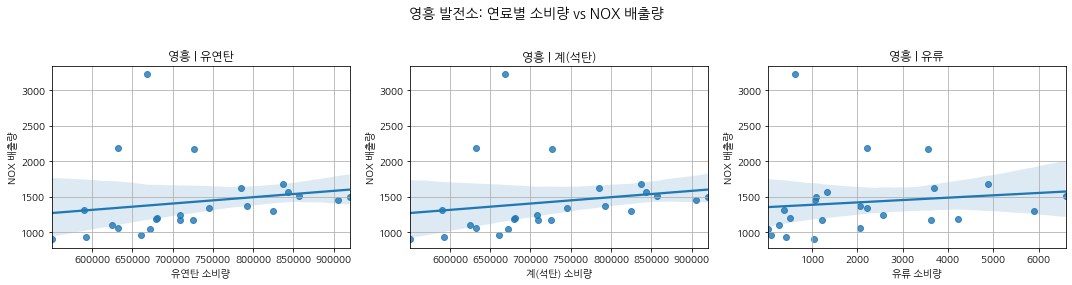

In [109]:
fuel_cols = ['유연탄', '무연탄', '계(석탄)', '유류', 'LNG', '고형연료', '우드펠릿']

# 발전소별 loop
for plant, group in merged_df.groupby('사업소'):
    # 실제로 그릴 연료 종류만 추림 (값이 0 또는 NaN이 아닌 것만)
    valid_fuels = [fuel for fuel in fuel_cols if group[fuel].sum() > 0 and not group[fuel].isnull().all()]
    
    n_fuels = len(valid_fuels)
    if n_fuels == 0:
        continue  # 그릴 연료가 없으면 skip
    
    fig, axes = plt.subplots(nrows=1, ncols=n_fuels, figsize=(5 * n_fuels, 4))
    
    # 서브플롯이 하나일 경우, 리스트처럼 다루기 위해 변환
    if n_fuels == 1:
        axes = [axes]
    
    for ax, fuel in zip(axes, valid_fuels):
        sns.regplot(x=fuel, y='NOX', data=group, ax=ax)
        ax.set_title(f'{plant} | {fuel}')
        ax.set_xlabel(f'{fuel} 소비량')
        ax.set_ylabel('NOX 배출량')
        ax.grid(True)
    
    plt.suptitle(f'{plant} 발전소: 연료별 소비량 vs NOX 배출량', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 확보
    plt.show()


#### 총연료 소비량

In [112]:
fuel_cols = ['유연탄', '무연탄', '유류', 'LNG', '고형연료', '우드펠릿']
merged_df['총연료소비량'] = merged_df[fuel_cols].sum(axis=1)
merged_df

,사업소,월,유연탄,무연탄,계(석탄),유류,LNG,고형연료,우드펠릿,NOX,총연료소비량
0,분당,2023-01,0,0,0,0,90933,0,0,1897.19,90933
1,분당,2023-02,0,0,0,0,69621,0,0,1546.34,69621
2,분당,2023-03,0,0,0,0,44796,0,0,1968.32,44796
3,분당,2023-04,0,0,0,0,17952,0,0,1159.09,17952
4,분당,2023-05,0,0,0,0,9575,0,0,1822.84,9575
...,...,...,...,...,...,...,...,...,...,...,...
115,영흥,2024-08,856874,0,856874,6598,0,0,0,1503.91,863472
116,영흥,2024-09,679766,0,679766,4211,0,0,0,1190.53,683977
117,영흥,2024-10,660493,0,660493,81,0,0,0,963.43,660574
118,영흥,2024-11,592313,0,592313,430,0,0,0,927.59,592743


In [115]:
for plant, group in merged_df.groupby('사업소'):
    corr = group['총연료소비량'].corr(group['NOX'])
    print(f'{plant} 발전소 - 총연료소비량과 NOX 상관계수: {corr:.3f}')

분당 발전소 - 총연료소비량과 NOX 상관계수: 0.581
삼천포 발전소 - 총연료소비량과 NOX 상관계수: -0.401
여수 발전소 - 총연료소비량과 NOX 상관계수: 0.023
영동 발전소 - 총연료소비량과 NOX 상관계수: -0.089
영흥 발전소 - 총연료소비량과 NOX 상관계수: 0.180


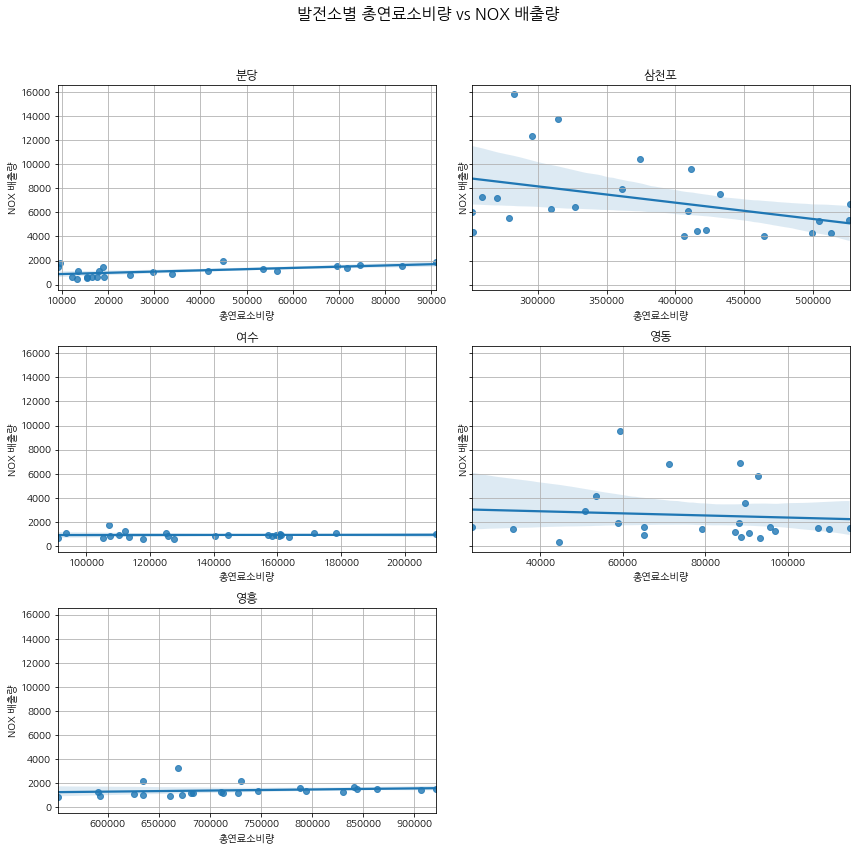

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

plants = merged_df['사업소'].unique()
n_plants = len(plants)

n_rows = 3
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), sharey=True)
axes = axes.flatten()  # 2D 배열을 1D로 변환해 반복문에 사용

for i, plant in enumerate(plants):
    data = merged_df[merged_df['사업소'] == plant]
    sns.regplot(x='총연료소비량', y='NOX', data=data, ax=axes[i])
    axes[i].set_title(f'{plant}')
    axes[i].set_xlabel('총연료소비량')
    axes[i].set_ylabel('NOX 배출량')
    axes[i].grid(True)

# 남는 subplot이 있을 경우 비워두기
for j in range(len(plants), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('발전소별 총연료소비량 vs NOX 배출량', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()